In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
loan_data_backup = pd.read_csv("loan_data_2007_2014.csv")

C:\Users\SH623GL\AppData\Local\Temp\ipykernel_6680\609116532.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_backup = pd.read_csv("loan_data_2007_2014.csv")


In [3]:
loan_data = loan_data_backup.copy()

In [4]:
loan_data.head(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EXPLORING THE DATA

In [5]:
pd.options.display.max_columns = None

In [6]:
loan_data

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,466280,8598660,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,4 years,MORTGAGE,110000.0,Source Verified,Jan-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773

In [7]:
loan_data.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [9]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [10]:
#transform text data in numeric
loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('< 1 year', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('n/a', str(0))
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('years', '')
loan_data['emp_length_int'] = loan_data['emp_length_int'].str.replace('year', '')




C:\Users\SH623GL\AppData\Local\Temp\ipykernel_6680\3497516422.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  loan_data['emp_length_int'] = loan_data['emp_length'].str.replace('\+ years', '')


In [11]:
loan_data['emp_length_int'].unique()

array(['10', '0', '1 ', '3 ', '8 ', '9 ', '4 ', '5 ', '6 ', '2 ', '7 ',
       nan], dtype=object)

In [12]:
type(loan_data['emp_length_int'][0])

str

In [13]:
loan_data['emp_length_int'] = pd.to_numeric(loan_data['emp_length_int'])

In [14]:
type(loan_data['emp_length_int'][0])

numpy.float64

In [15]:
loan_data['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [16]:
loan_data['term_int'] = loan_data['term'].str.replace(' months', '')

In [17]:
loan_data['term_int'] = pd.to_numeric(loan_data['term_int'])

In [18]:
type(loan_data['term_int'][0])

numpy.int64

In [19]:
loan_data['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [20]:
#transform into datetime
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format = '%b-%y')

In [21]:
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [22]:
pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']

0        12022 days
1         6819 days
2         5874 days
3         7974 days
4         8005 days
            ...    
466280    5358 days
466281    7488 days
466282    5844 days
466283    5417 days
466284    6513 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [23]:
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date'])/ np.timedelta64(1, 'M')))

In [24]:
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [25]:
#solving the issue of negative datetime
#1 - Counting the negative results
loan_data.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0
...,...,...,...
464003,Jan-68,2068-01-01,-601.0
464260,Jul-66,2066-07-01,-583.0
465100,Oct-67,2067-10-01,-598.0
465500,Sep-67,2067-09-01,-597.0


In [26]:
#2 - Substituting them to the maximum value shown in the data frame
loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line']<0] = loan_data['mths_since_earliest_cr_line'].max()

C:\Users\SH623GL\AppData\Local\Temp\ipykernel_6680\2690945829.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data['mths_since_earliest_cr_line'][loan_data['mths_since_earliest_cr_line']<0] = loan_data['mths_since_earliest_cr_line'].max()


In [27]:
min(loan_data['mths_since_earliest_cr_line'])

73.0

In [28]:
#issue_date needs the same preprocessing
loan_data['issue_date'] = pd.to_datetime(loan_data['issue_d'], format = '%b-%y')

In [29]:
type(loan_data['issue_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [30]:
pd.to_datetime('2017-12-01') - loan_data['issue_date']

0        2192 days
1        2192 days
2        2192 days
3        2192 days
4        2192 days
            ...   
466280   1430 days
466281   1430 days
466282   1430 days
466283   1430 days
466284   1430 days
Name: issue_date, Length: 466285, dtype: timedelta64[ns]

In [31]:
loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['issue_date'])/ np.timedelta64(1, 'M')))

In [32]:
loan_data['mths_since_issue_d'].describe()

count    466285.000000
mean         51.255187
std          14.340154
min          36.000000
25%          41.000000
50%          47.000000
75%          57.000000
max         126.000000
Name: mths_since_issue_d, dtype: float64

Preprocessing few discrete variables

In [33]:
pd.get_dummies(loan_data['grade'])

,A,B,C,D,E,F,G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [34]:
pd.get_dummies(loan_data['grade'], prefix='grade', prefix_sep=":")

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
466280,0,0,1,0,0,0,0
466281,0,0,0,1,0,0,0
466282,0,0,0,1,0,0,0
466283,1,0,0,0,0,0,0


In [35]:
loan_data_dummies = [
    pd.get_dummies(loan_data['grade'], prefix='grade', prefix_sep=':'),
    pd.get_dummies(loan_data['sub_grade'], prefix='sub_grade', prefix_sep=':'),
    pd.get_dummies(loan_data['home_ownership'], prefix='home_ownership', prefix_sep=':'),
    pd.get_dummies(loan_data['verification_status'], prefix='verification_status', prefix_sep=':'),
    pd.get_dummies(loan_data['loan_status'], prefix='loan_status', prefix_sep=':'),
    pd.get_dummies(loan_data['purpose'], prefix='purpose', prefix_sep=':'),
    pd.get_dummies(loan_data['addr_state'], prefix='addr_state', prefix_sep=':'),
    pd.get_dummies(loan_data['initial_list_status'], prefix='initial_list_status', prefix_sep=':')
]

In [36]:
#axis =1 -> concatenate the tables refering to the colunms (variables)
#axis = 2 -> concatenate the tables refering to the rows (observations)
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [37]:
type(loan_data_dummies)

pandas.core.frame.DataFrame

In [38]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)

In [39]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

Check for missing data

In [40]:
loan_data.isnull()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,term_int,earliest_cr_line_date,mths_since_earliest_cr_line,issue_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Does not meet the credit policy. Status:Charged Off,loan_status:Does not meet the credit policy. Status:Fully Paid,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:ID,addr_state:IL,addr_state:IN,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:ME,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NE,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,initial_list_status:w
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [41]:
pd.options.display.max_rows = None
loan_data.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

In [42]:
pd.options.display.max_rows = 100

In [43]:
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace=True)

In [44]:
loan_data['total_rev_hi_lim'].isnull().sum()

0

In [45]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)

In [46]:
loan_data['acc_now_delinq'].isnull().sum()

0

# PD Model

Data Preparation

Dependent Variable, Good/Bad(Default) Definition

In [47]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [48]:
loan_data['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [49]:
loan_data['loan_status'].value_counts() / loan_data['loan_status'].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [50]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off', 'Default',
                                                                'Does not meet the credit policy. Status:Charged Off',
                                                                'Late (16-30 days)']), 0, 1)

In [51]:
loan_data['good_bad']

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int32

Splitting Data

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'])

[        Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
 76862        76862   8065084    9787214       4000         4000   
 417923      417923  13276710   15318943       1200         1200   
 193861      193861   1581599    1850457       9275         9275   
 42448        42448    120273     120270       5000         5000   
 34271        34271    455152     564331      20000        20000   
 ...            ...       ...        ...        ...          ...   
 355284      355284  20258564   22521293      33000        33000   
 344123      344123  21360926   23673785      11000        11000   
 434309      434309  12417410   14429545      15750        15750   
 326382      326382  24015996   26388527       6200         6200   
 182501      182501   2275954    2698199       4800         4800   
 
         funded_amnt_inv        term  int_rate  installment grade sub_grade  \
 76862        4000.00000   36 months     14.30       137.30     C        C1   
 417923       1200.00000

In [54]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'])

In [55]:
loan_data_inputs_train.shape

(349713, 207)

In [56]:
loan_data_targets_train.shape

(349713,)

In [57]:
loan_data_inputs_test.shape

(116572, 207)

In [58]:
loan_data_targets_test.shape

(116572,)

Defining the split set in 80% - 20%

In [59]:
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(loan_data.drop('good_bad', axis = 1), loan_data['good_bad'], test_size = 0.2, random_state = 42)

In [60]:
loan_data_inputs_train.shape

(373028, 207)

In [61]:
loan_data_targets_train.shape

(373028,)

In [62]:
loan_data_inputs_test.shape

(93257, 207)

In [63]:
loan_data_targets_test.shape

(93257,)

DATA PREPARATION

In [160]:
#If it is the first atempt them uncomment the first two rows
#If you already preprocessing the variables them comment the first two rows and uncomment the next two rows 

#df_inputs_prepr = loan_data_inputs_train
#df_targets_prepr = loan_data_targets_train
df_inputs_prepr = loan_data_inputs_test
df_targets_prepr = loan_data_targets_test

In [161]:
df_inputs_prepr['grade'].unique()

array(['C', 'E', 'A', 'D', 'B', 'F', 'G'], dtype=object)

In [162]:
df1 = pd.concat([df_inputs_prepr['grade'], df_targets_prepr], axis = 1)
df1.head()

,grade,good_bad
362514,C,1
288564,E,1
213591,C,1
263083,C,1
165001,A,1


In [163]:
df1.groupby(df1.columns.values[0], as_index= False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,15108
1,B,27199
2,C,25048
3,D,15390
4,E,7145
5,F,2699
6,G,668


In [164]:
df1.groupby(df1.columns.values[0], as_index= False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.965714
1,B,0.931211
2,C,0.896040
3,D,0.863938
4,E,0.829531
5,F,0.799555
6,G,0.729042


In [165]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index= False)[df1.columns.values[1]].count(),
                 df1.groupby(df1.columns.values[0], as_index= False)[df1.columns.values[1]].mean()],
                 axis = 1
)
df1

,grade,good_bad,grade,good_bad
0,A,15108,A,0.965714
1,B,27199,B,0.931211
2,C,25048,C,0.896040
3,D,15390,D,0.863938
4,E,7145,E,0.829531
5,F,2699,F,0.799555
6,G,668,G,0.729042


In [166]:
df1 = df1.iloc[: , [0,1,3]]
df1

,grade,good_bad,good_bad
0,A,15108,0.965714
1,B,27199,0.931211
2,C,25048,0.896040
3,D,15390,0.863938
4,E,7145,0.829531
5,F,2699,0.799555
6,G,668,0.729042


In [167]:
df1.columns = [df1.columns.values[0], 'n_obs', 'prop_good']
df1

,grade,n_obs,prop_good
0,A,15108,0.965714
1,B,27199,0.931211
2,C,25048,0.896040
3,D,15390,0.863938
4,E,7145,0.829531
5,F,2699,0.799555
6,G,668,0.729042


In [168]:
df1['prop_n_obs'] = df1['n_obs'] / df1['n_obs'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs
0,A,15108,0.965714,0.162004
1,B,27199,0.931211,0.291656
2,C,25048,0.896040,0.268591
3,D,15390,0.863938,0.165028
4,E,7145,0.829531,0.076616
5,F,2699,0.799555,0.028942
6,G,668,0.729042,0.007163


In [169]:
df1['n_good'] = df1['prop_good'] * df1['n_obs']
df1['n_bad'] = (1- df1['prop_good']) * df1['n_obs']
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad
0,A,15108,0.965714,0.162004,14590.0,518.0
1,B,27199,0.931211,0.291656,25328.0,1871.0
2,C,25048,0.896040,0.268591,22444.0,2604.0
3,D,15390,0.863938,0.165028,13296.0,2094.0
4,E,7145,0.829531,0.076616,5927.0,1218.0
5,F,2699,0.799555,0.028942,2158.0,541.0
6,G,668,0.729042,0.007163,487.0,181.0


In [170]:
df1['prop_n_good'] = df1['n_good'] / df1['n_good'].sum()
df1['prop_n_bad'] = df1['n_bad'] / df1['n_bad'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,15108,0.965714,0.162004,14590.0,518.0,0.173216,0.057383
1,B,27199,0.931211,0.291656,25328.0,1871.0,0.300700,0.207267
2,C,25048,0.896040,0.268591,22444.0,2604.0,0.266461,0.288468
3,D,15390,0.863938,0.165028,13296.0,2094.0,0.157853,0.231971
4,E,7145,0.829531,0.076616,5927.0,1218.0,0.070367,0.134929
5,F,2699,0.799555,0.028942,2158.0,541.0,0.025620,0.059931
6,G,668,0.729042,0.007163,487.0,181.0,0.005782,0.020051


In [171]:
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,A,15108,0.965714,0.162004,14590.0,518.0,0.173216,0.057383,1.104785
1,B,27199,0.931211,0.291656,25328.0,1871.0,0.300700,0.207267,0.372106
2,C,25048,0.896040,0.268591,22444.0,2604.0,0.266461,0.288468,-0.079356
3,D,15390,0.863938,0.165028,13296.0,2094.0,0.157853,0.231971,-0.384944
4,E,7145,0.829531,0.076616,5927.0,1218.0,0.070367,0.134929,-0.651023
5,F,2699,0.799555,0.028942,2158.0,541.0,0.025620,0.059931,-0.849813
6,G,668,0.729042,0.007163,487.0,181.0,0.005782,0.020051,-1.243564


In [172]:
df1 = df1.sort_values(['WoE'])
df1 = df1.reset_index(drop=True)
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,668,0.729042,0.007163,487.0,181.0,0.005782,0.020051,-1.243564
1,F,2699,0.799555,0.028942,2158.0,541.0,0.025620,0.059931,-0.849813
2,E,7145,0.829531,0.076616,5927.0,1218.0,0.070367,0.134929,-0.651023
3,D,15390,0.863938,0.165028,13296.0,2094.0,0.157853,0.231971,-0.384944
4,C,25048,0.896040,0.268591,22444.0,2604.0,0.266461,0.288468,-0.079356
5,B,27199,0.931211,0.291656,25328.0,1871.0,0.300700,0.207267,0.372106
6,A,15108,0.965714,0.162004,14590.0,518.0,0.173216,0.057383,1.104785


In [173]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
df1['WoE'] = df1['WoE'].diff().abs()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good
0,G,668,0.729042,0.007163,487.0,181.0,0.005782,0.020051,NaN,NaN
1,F,2699,0.799555,0.028942,2158.0,541.0,0.025620,0.059931,0.393751,0.070513
2,E,7145,0.829531,0.076616,5927.0,1218.0,0.070367,0.134929,0.198790,0.029976
3,D,15390,0.863938,0.165028,13296.0,2094.0,0.157853,0.231971,0.266079,0.034406
4,C,25048,0.896040,0.268591,22444.0,2604.0,0.266461,0.288468,0.305587,0.032102
5,B,27199,0.931211,0.291656,25328.0,1871.0,0.300700,0.207267,0.451463,0.035171
6,A,15108,0.965714,0.162004,14590.0,518.0,0.173216,0.057383,0.732679,0.034503


In [174]:
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,IV
0,G,668,0.729042,0.007163,487.0,181.0,0.005782,0.020051,NaN,NaN,0.07426
1,F,2699,0.799555,0.028942,2158.0,541.0,0.025620,0.059931,0.393751,0.070513,0.07426
2,E,7145,0.829531,0.076616,5927.0,1218.0,0.070367,0.134929,0.198790,0.029976,0.07426
3,D,15390,0.863938,0.165028,13296.0,2094.0,0.157853,0.231971,0.266079,0.034406,0.07426
4,C,25048,0.896040,0.268591,22444.0,2604.0,0.266461,0.288468,0.305587,0.032102,0.07426
5,B,27199,0.931211,0.291656,25328.0,1871.0,0.300700,0.207267,0.451463,0.035171,0.07426
6,A,15108,0.965714,0.162004,14590.0,518.0,0.173216,0.057383,0.732679,0.034503,0.07426


Automating the process of Information value

In [175]:
def woe_discrete(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[: ,[0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop=True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

Testing

In [176]:
df_temp = woe_discrete(df_inputs_prepr, 'grade', df_targets_prepr)
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,668,0.729042,0.007163,487.0,181.0,0.005782,0.020051,-1.243564,NaN,NaN,0.281949
1,F,2699,0.799555,0.028942,2158.0,541.0,0.025620,0.059931,-0.849813,0.070513,0.393751,0.281949
2,E,7145,0.829531,0.076616,5927.0,1218.0,0.070367,0.134929,-0.651023,0.029976,0.198790,0.281949
3,D,15390,0.863938,0.165028,13296.0,2094.0,0.157853,0.231971,-0.384944,0.034406,0.266079,0.281949
4,C,25048,0.896040,0.268591,22444.0,2604.0,0.266461,0.288468,-0.079356,0.032102,0.305587,0.281949
5,B,27199,0.931211,0.291656,25328.0,1871.0,0.300700,0.207267,0.372106,0.035171,0.451463,0.281949
6,A,15108,0.965714,0.162004,14590.0,518.0,0.173216,0.057383,1.104785,0.034503,0.732679,0.281949


Preprocessing Discrete Variables

In [177]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [178]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [179]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[: , 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize= (18,6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)


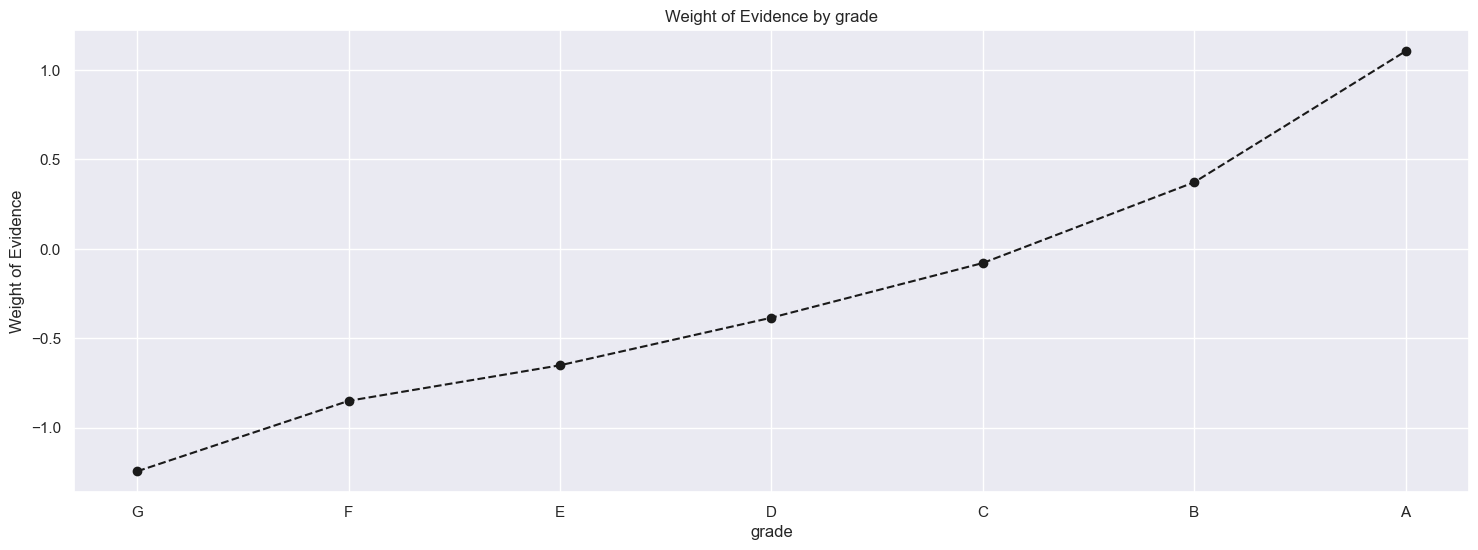

In [180]:
plot_by_woe(df_temp)

Preprocessing Discrete Variables

In [181]:
df_temp = woe_discrete(df_inputs_prepr, 'home_ownership', df_targets_prepr)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,45,0.777778,0.000483,35.0,10.0,0.000416,0.001108,-0.980568,NaN,NaN,0.023679
1,NONE,10,0.800000,0.000107,8.0,2.0,0.000095,0.000222,-0.847037,0.022222,0.133531,0.023679
2,RENT,37874,0.887944,0.406125,33630.0,4244.0,0.399264,0.470145,-0.163419,0.087944,0.683618,0.023679
3,OWN,8409,0.901891,0.090170,7584.0,825.0,0.090039,0.091392,-0.014918,0.013947,0.148500,0.023679
4,MORTGAGE,46919,0.915898,0.503115,42973.0,3946.0,0.510186,0.437133,0.154539,0.014007,0.169457,0.023679


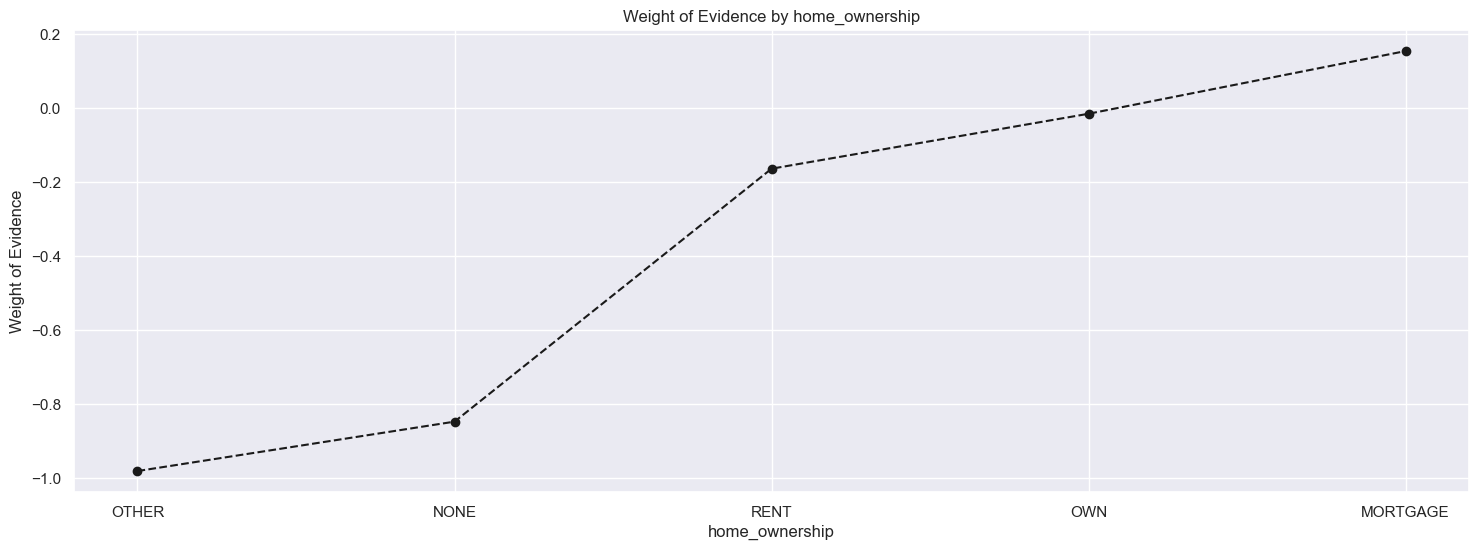

In [182]:
plot_by_woe(df_temp)

In [183]:
df_inputs_prepr['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_prepr['home_ownership:RENT'], df_inputs_prepr['home_ownership:OTHER'],
                                                             df_inputs_prepr['home_ownership:NONE'], df_inputs_prepr['home_ownership:ANY']])

In [184]:
df_inputs_prepr['addr_state'].unique()

array(['CA', 'IN', 'AZ', 'MI', 'PA', 'MO', 'CT', 'IL', 'SC', 'VA', 'NY',
       'FL', 'TX', 'NC', 'NM', 'NJ', 'KY', 'DE', 'OK', 'CO', 'OH', 'GA',
       'LA', 'WA', 'AL', 'TN', 'MD', 'NV', 'MN', 'RI', 'NH', 'MA', 'MS',
       'UT', 'WV', 'HI', 'KS', 'OR', 'WY', 'WI', 'AK', 'DC', 'AR', 'MT',
       'SD', 'VT', 'IA', 'ID', 'ME', 'NE'], dtype=object)

In [185]:
df_temp = woe_discrete(df_inputs_prepr, 'addr_state', df_targets_prepr)
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,ID,2,0.500000,0.000021,1.0,1.0,0.000012,0.000111,-2.233331,NaN,NaN,inf
1,NV,1298,0.875963,0.013919,1137.0,161.0,0.013499,0.017835,-0.278587,0.375963,1.954744,inf
2,HI,486,0.882716,0.005211,429.0,57.0,0.005093,0.006314,-0.214925,0.006753,0.063662,inf
3,FL,6426,0.883598,0.068906,5678.0,748.0,0.067411,0.082863,-0.206380,0.000882,0.008546,inf
4,AL,1182,0.884095,0.012675,1045.0,137.0,0.012407,0.015177,-0.201540,0.000497,0.004840,inf
5,DE,208,0.884615,0.002230,184.0,24.0,0.002184,0.002659,-0.196449,0.000521,0.005091,inf
6,NJ,3676,0.884657,0.039418,3252.0,424.0,0.038609,0.046970,-0.196039,0.000042,0.000410,inf
7,LA,1130,0.885841,0.012117,1001.0,129.0,0.011884,0.014290,-0.184389,0.001183,0.011650,inf
8,NY,8031,0.894658,0.086117,7185.0,846.0,0.085302,0.093719,-0.094100,0.008817,0.090289,inf
9,RI,403,0.895782,0.004321,361.0,42.0,0.004286,0.004653,-0.082123,0.001123,0.011977,inf


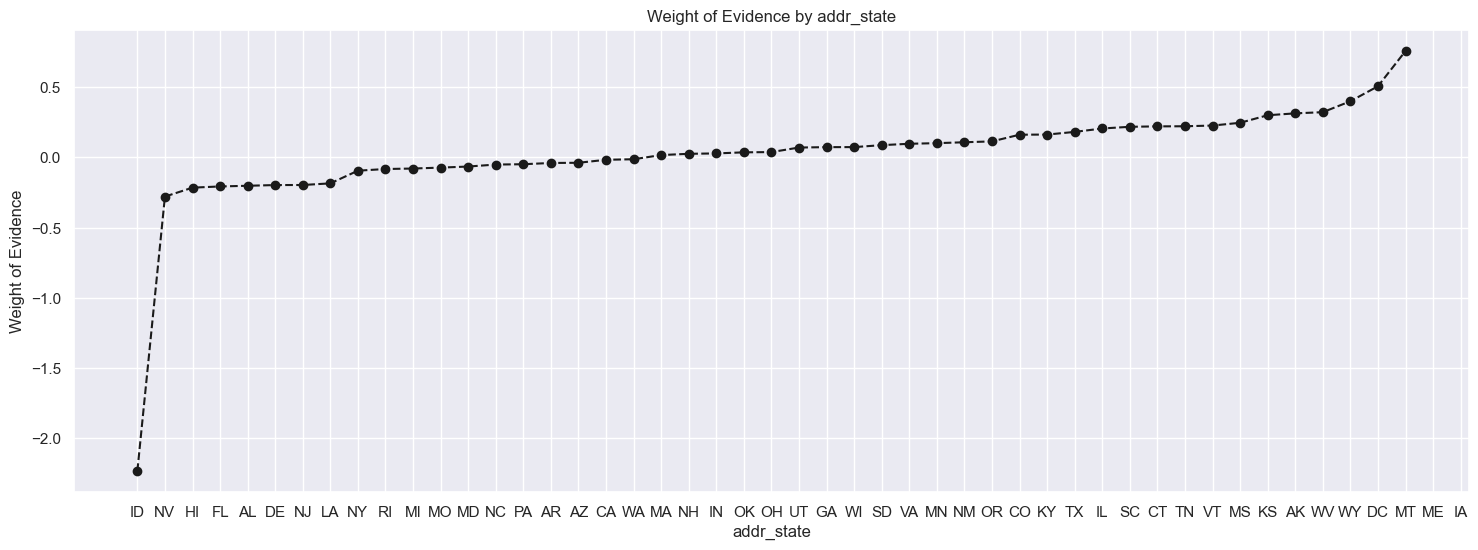

In [186]:
plot_by_woe(df_temp)

In [187]:
if ['addr_state:ND'] in df_inputs_prepr.columns.values:
    pass
else:
    df_inputs_prepr['addr_state:ND'] = 0

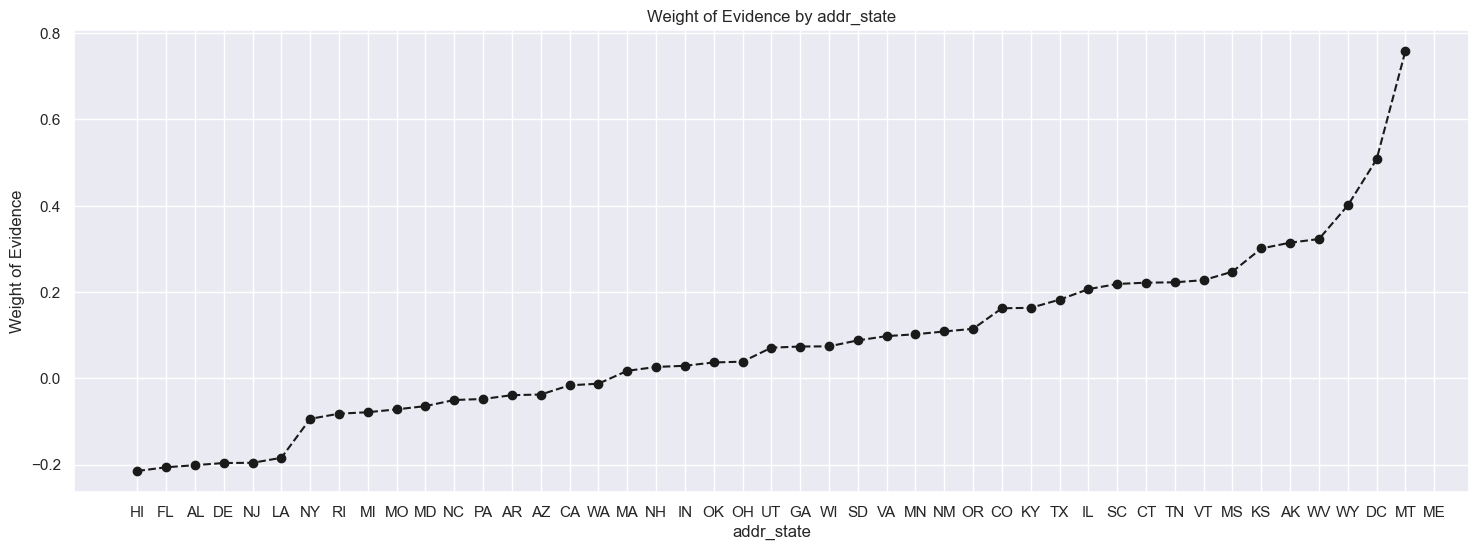

In [188]:
plot_by_woe(df_temp.iloc[2:-2, :])

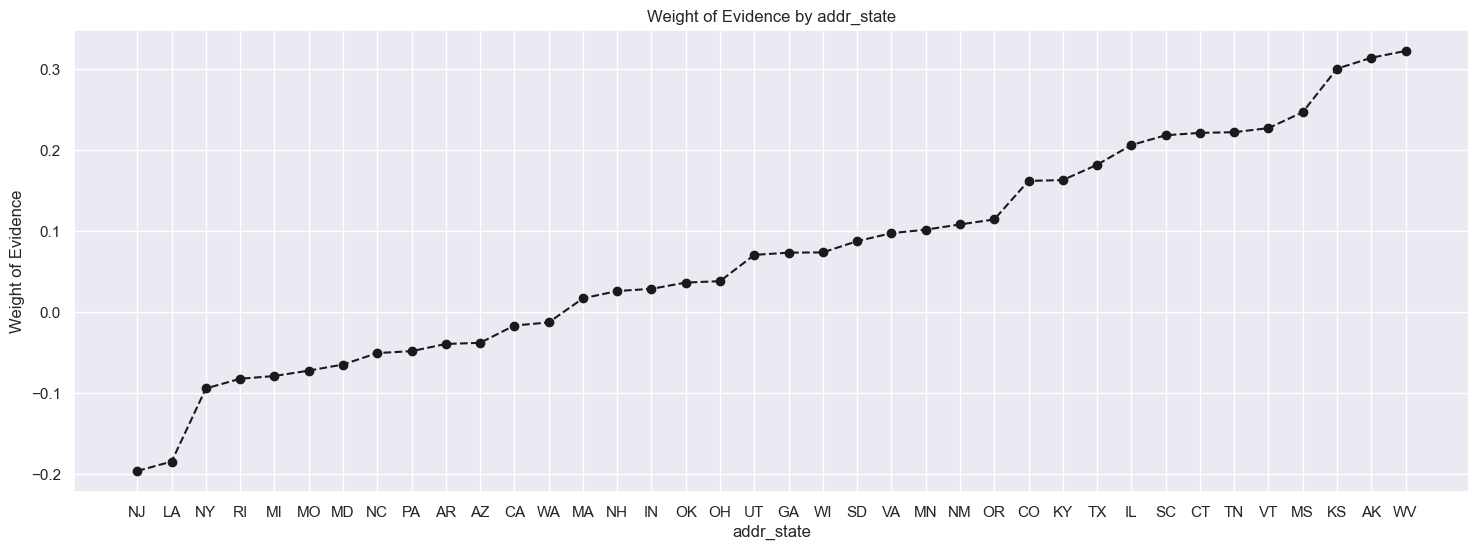

In [189]:
plot_by_woe(df_temp.iloc[6:-6, :])

In [190]:
# We create the following categories:
# 'ND' 'NE' 'IA' NV' 'FL' 'HI' 'AL'
# 'NM' 'VA'
# 'NY'
# 'OK' 'TN' 'MO' 'LA' 'MD' 'NC'
# 'CA'
# 'UT' 'KY' 'AZ' 'NJ'
# 'AR' 'MI' 'PA' 'OH' 'MN'
# 'RI' 'MA' 'DE' 'SD' 'IN'
# 'GA' 'WA' 'OR'
# 'WI' 'MT'
# 'TX'
# 'IL' 'CT'
# 'KS' 'SC' 'CO' 'VT' 'AK' 'MS'
# 'WV' 'NH' 'WY' 'DC' 'ME' 'ID'

# 'IA_NV_HI_ID_AL_FL' will be the reference category.

df_inputs_prepr['addr_state:ND_NE_IA_NV_FL_HI_AL'] = sum([df_inputs_prepr['addr_state:ND'], df_inputs_prepr['addr_state:NE'],
                                              df_inputs_prepr['addr_state:IA'], df_inputs_prepr['addr_state:NV'],
                                              df_inputs_prepr['addr_state:FL'], df_inputs_prepr['addr_state:HI'],
                                                          df_inputs_prepr['addr_state:AL']])

df_inputs_prepr['addr_state:NM_VA'] = sum([df_inputs_prepr['addr_state:NM'], df_inputs_prepr['addr_state:VA']])

df_inputs_prepr['addr_state:OK_TN_MO_LA_MD_NC'] = sum([df_inputs_prepr['addr_state:OK'], df_inputs_prepr['addr_state:TN'],
                                              df_inputs_prepr['addr_state:MO'], df_inputs_prepr['addr_state:LA'],
                                              df_inputs_prepr['addr_state:MD'], df_inputs_prepr['addr_state:NC']])

df_inputs_prepr['addr_state:UT_KY_AZ_NJ'] = sum([df_inputs_prepr['addr_state:UT'], df_inputs_prepr['addr_state:KY'],
                                              df_inputs_prepr['addr_state:AZ'], df_inputs_prepr['addr_state:NJ']])

df_inputs_prepr['addr_state:AR_MI_PA_OH_MN'] = sum([df_inputs_prepr['addr_state:AR'], df_inputs_prepr['addr_state:MI'],
                                              df_inputs_prepr['addr_state:PA'], df_inputs_prepr['addr_state:OH'],
                                              df_inputs_prepr['addr_state:MN']])

df_inputs_prepr['addr_state:RI_MA_DE_SD_IN'] = sum([df_inputs_prepr['addr_state:RI'], df_inputs_prepr['addr_state:MA'],
                                              df_inputs_prepr['addr_state:DE'], df_inputs_prepr['addr_state:SD'],
                                              df_inputs_prepr['addr_state:IN']])

df_inputs_prepr['addr_state:GA_WA_OR'] = sum([df_inputs_prepr['addr_state:GA'], df_inputs_prepr['addr_state:WA'],
                                              df_inputs_prepr['addr_state:OR']])

df_inputs_prepr['addr_state:WI_MT'] = sum([df_inputs_prepr['addr_state:WI'], df_inputs_prepr['addr_state:MT']])

df_inputs_prepr['addr_state:IL_CT'] = sum([df_inputs_prepr['addr_state:IL'], df_inputs_prepr['addr_state:CT']])

df_inputs_prepr['addr_state:KS_SC_CO_VT_AK_MS'] = sum([df_inputs_prepr['addr_state:KS'], df_inputs_prepr['addr_state:SC'],
                                              df_inputs_prepr['addr_state:CO'], df_inputs_prepr['addr_state:VT'],
                                              df_inputs_prepr['addr_state:AK'], df_inputs_prepr['addr_state:MS']])

df_inputs_prepr['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prepr['addr_state:WV'], df_inputs_prepr['addr_state:NH'],
                                              df_inputs_prepr['addr_state:WY'], df_inputs_prepr['addr_state:DC'],
                                              df_inputs_prepr['addr_state:ME'], df_inputs_prepr['addr_state:ID']])

In [191]:
df_temp = woe_discrete(df_inputs_prepr, 'verification_status', df_targets_prepr)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,33641,0.885616,0.360734,29793.0,3848.0,0.353710,0.426277,-0.186611,NaN,NaN,0.022632
1,Source Verified,29963,0.910990,0.321295,27296.0,2667.0,0.324065,0.295447,0.092455,0.025374,0.279066,0.022632
2,Not Verified,29653,0.915287,0.317971,27141.0,2512.0,0.322225,0.278276,0.146635,0.004297,0.054180,0.022632


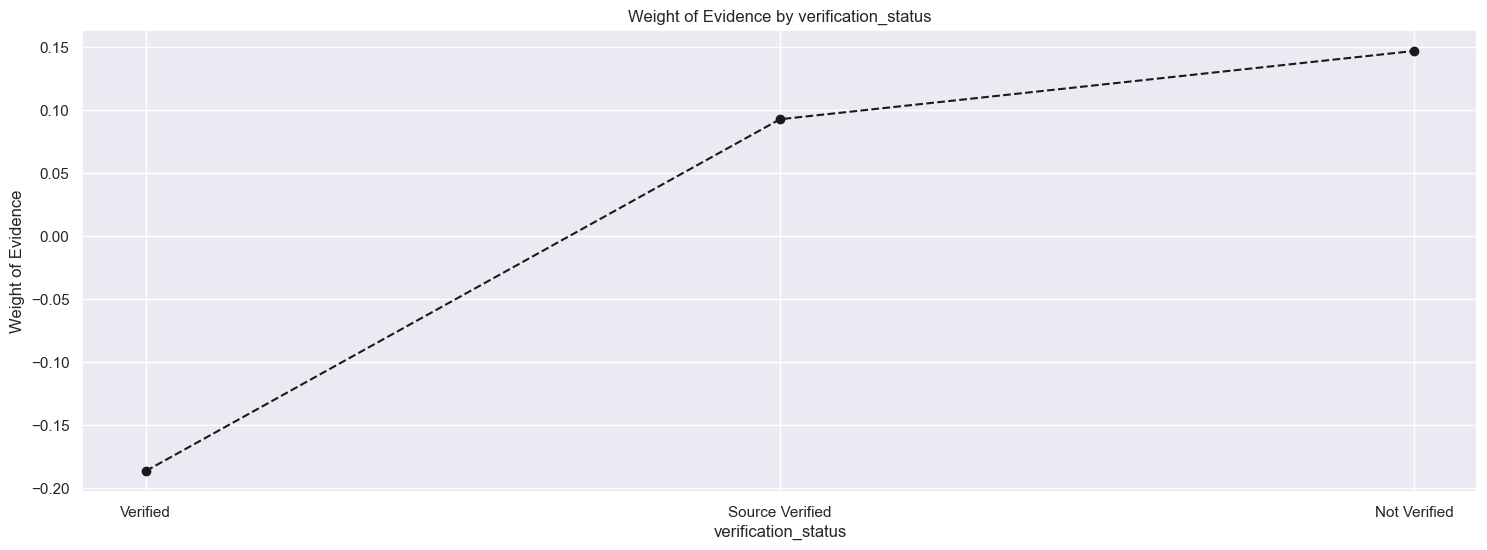

In [192]:
plot_by_woe(df_temp)

In [193]:
df_temp = woe_discrete(df_inputs_prepr, 'purpose', df_targets_prepr)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,educational,89,0.752809,0.000954,67.0,22.0,0.000795,0.002437,-1.119681,NaN,NaN,0.052699
1,renewable_energy,70,0.771429,0.000751,54.0,16.0,0.000641,0.001772,-1.016936,0.018620,0.102745,0.052699
2,small_business,1431,0.789658,0.015345,1130.0,301.0,0.013416,0.033344,-0.910468,0.018229,0.106467,0.052699
3,medical,918,0.863834,0.009844,793.0,125.0,0.009415,0.013847,-0.385822,0.074177,0.524647,0.052699
4,house,439,0.870159,0.004707,382.0,57.0,0.004535,0.006314,-0.330962,0.006325,0.054860,0.052699
5,other,4806,0.872243,0.051535,4192.0,614.0,0.049768,0.068018,-0.312393,0.002084,0.018569,0.052699
6,wedding,456,0.875000,0.004890,399.0,57.0,0.004737,0.006314,-0.287421,0.002757,0.024972,0.052699
7,vacation,496,0.885081,0.005319,439.0,57.0,0.005212,0.006314,-0.191883,0.010081,0.095538,0.052699
8,moving,602,0.885382,0.006455,533.0,69.0,0.006328,0.007644,-0.188916,0.000301,0.002967,0.052699
9,debt_consolidation,55012,0.899676,0.589897,49493.0,5519.0,0.587593,0.611388,-0.039697,0.014294,0.149220,0.052699


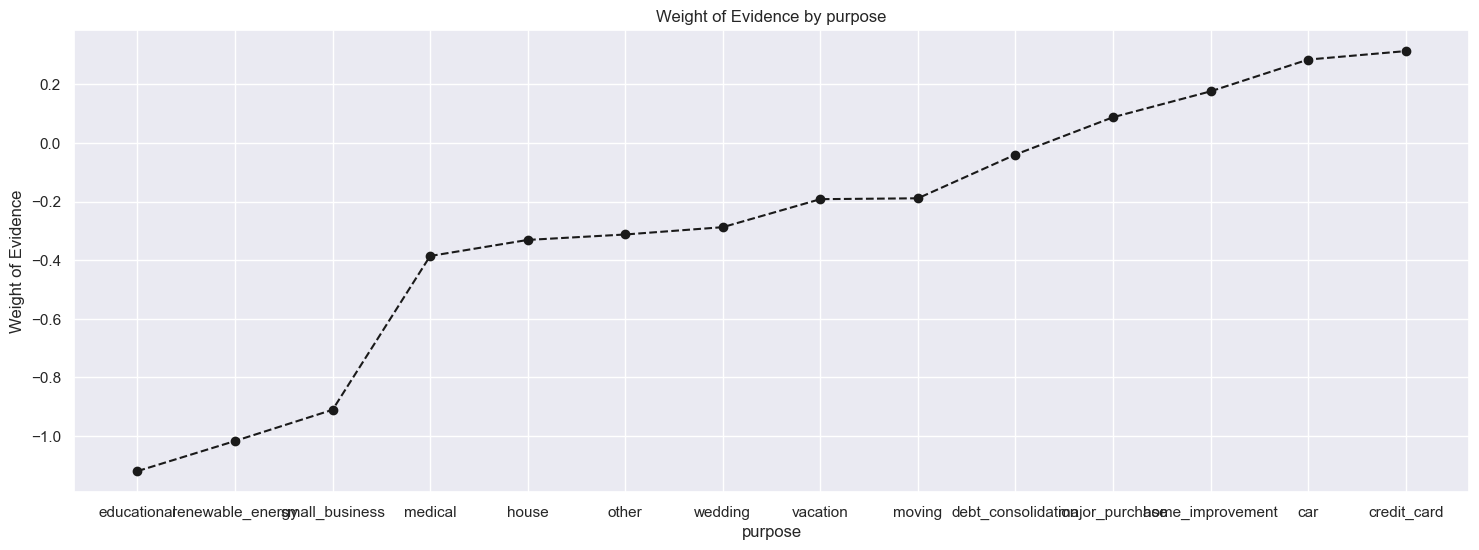

In [194]:
plot_by_woe(df_temp)

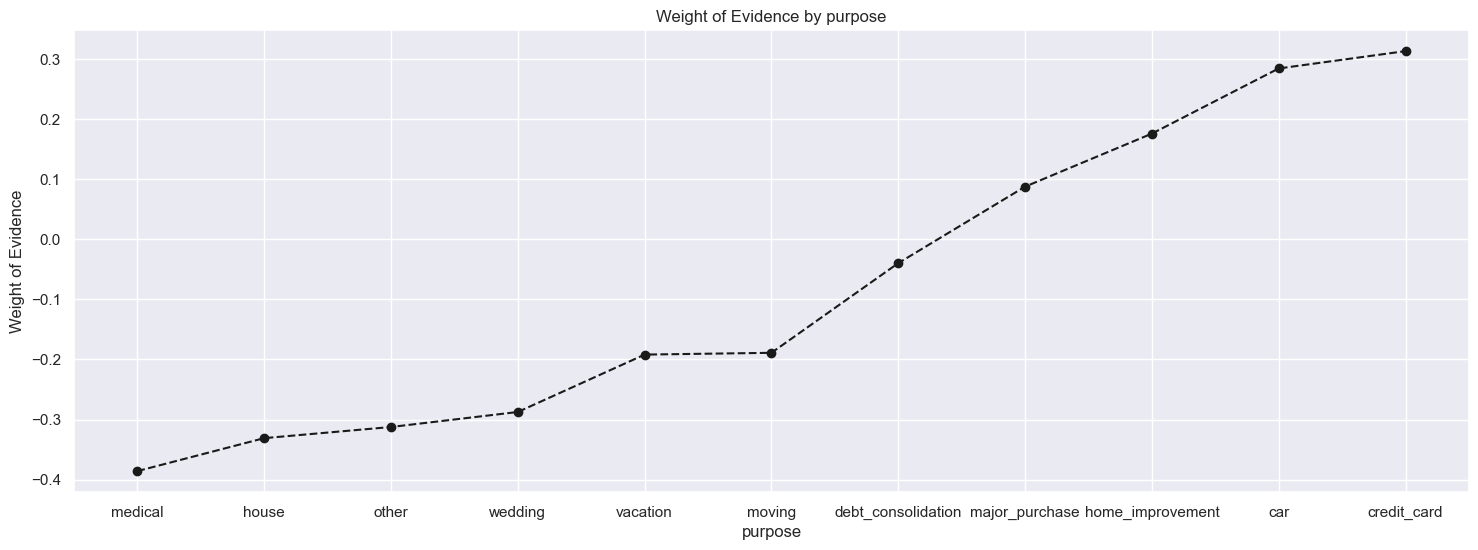

In [195]:
plot_by_woe(df_temp.iloc[3:, :])

In [196]:
# We combine 'educational', 'small_business', 'wedding', 'renewable_energy', 'moving', 'house' in one category: 'educ__sm_b__wedd__ren_en__mov__house'.
# We combine 'other', 'medical', 'vacation' in one category: 'oth__med__vacation'.
# We combine 'major_purchase', 'car', 'home_improvement' in one category: 'major_purch__car__home_impr'.
# We leave 'debt_consolidation' in a separate category.
# We leave 'credit_card' in a separate category.
# 'educ__sm_b__wedd__ren_en__mov__house' will be the reference category.
df_inputs_prepr['purpose:educ__sm_b__wedd__ren_en__mov__house'] = sum([df_inputs_prepr['purpose:educational'], df_inputs_prepr['purpose:small_business'],
                                                                 df_inputs_prepr['purpose:wedding'], df_inputs_prepr['purpose:renewable_energy'],
                                                                 df_inputs_prepr['purpose:moving'], df_inputs_prepr['purpose:house']])
df_inputs_prepr['purpose:oth__med__vacation'] = sum([df_inputs_prepr['purpose:other'], df_inputs_prepr['purpose:medical'],
                                             df_inputs_prepr['purpose:vacation']])
df_inputs_prepr['purpose:major_purch__car__home_impr'] = sum([df_inputs_prepr['purpose:major_purchase'], df_inputs_prepr['purpose:car'],
                                                        df_inputs_prepr['purpose:home_improvement']])

In [197]:
df_temp = woe_discrete(df_inputs_prepr, 'initial_list_status', df_targets_prepr)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,60491,0.890992,0.648648,53897.0,6594.0,0.639879,0.730475,-0.132416,NaN,NaN,0.038249
1,w,32766,0.925746,0.351352,30333.0,2433.0,0.360121,0.269525,0.289780,0.034754,0.422196,0.038249


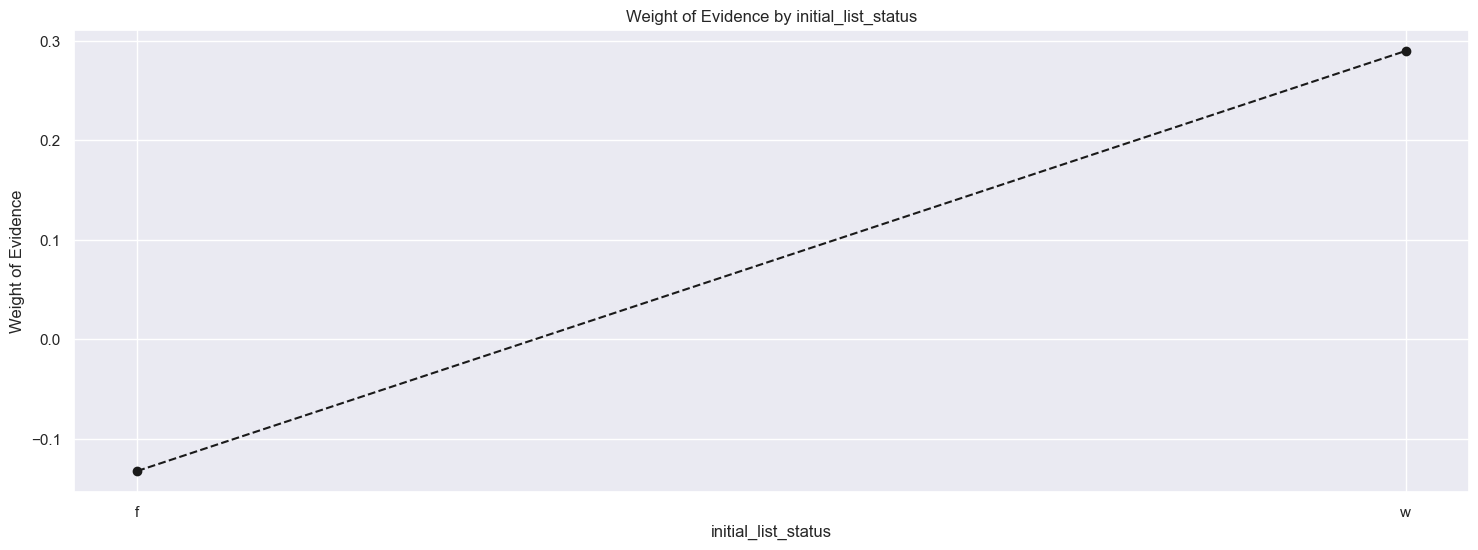

In [198]:
plot_by_woe(df_temp)

Preprocesing Continuous Variables

In [199]:
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis=1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[: ,[0,1,3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop=True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [200]:
df_inputs_prepr['term_int'].unique()

array([60, 36], dtype=int64)

In [201]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'term_int', df_targets_prepr)
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,67534,0.912711,0.724171,61639.0,5895.0,0.731794,0.653041,0.113859,NaN,NaN,0.029242
1,60,25723,0.878241,0.275829,22591.0,3132.0,0.268206,0.346959,-0.257451,0.034469,0.37131,0.029242


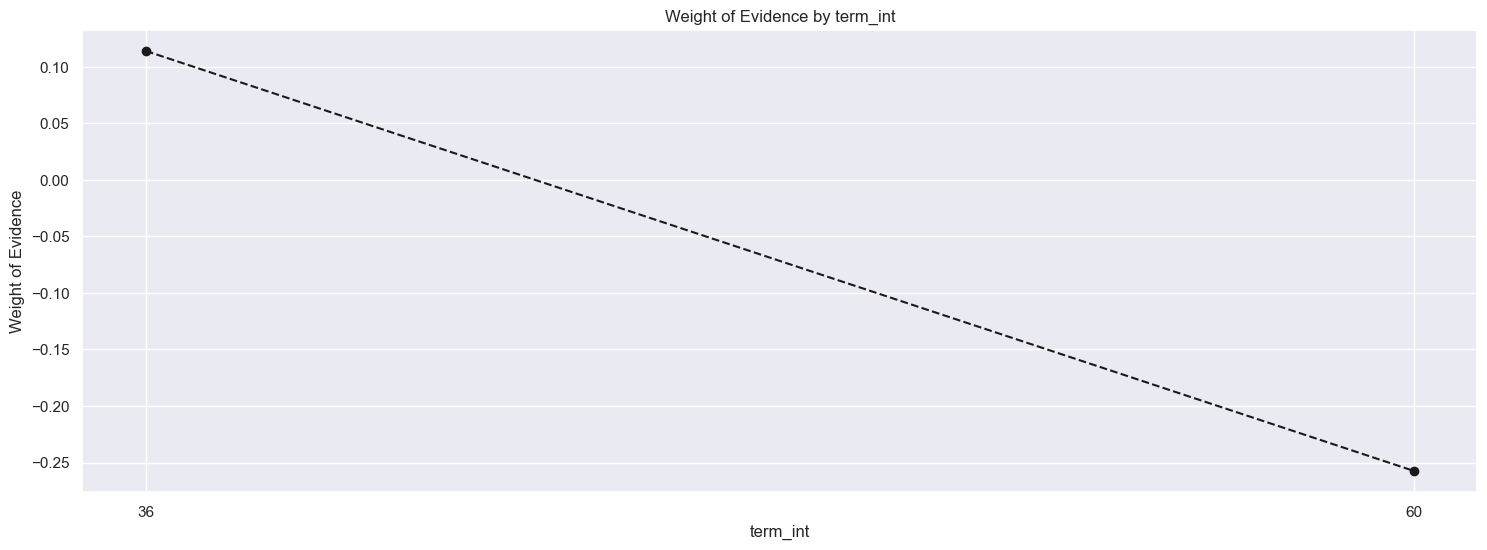

In [202]:
plot_by_woe(df_temp)

In [203]:
df_inputs_prepr['term:36'] = np.where((df_inputs_prepr['term_int'] == 36), 1, 0)
df_inputs_prepr['term:60'] = np.where((df_inputs_prepr['term_int'] == 60), 1, 0)

In [204]:
df_inputs_prepr['emp_length_int'].unique()

array([ 0., 10.,  1.,  2.,  9.,  3.,  6.,  4.,  7.,  8.,  5.])

In [205]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'emp_length_int', df_targets_prepr)
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,11553,0.889726,0.123883,10279.0,1274.0,0.122035,0.141132,-0.145390,NaN,NaN,0.008283
1,1.0,5968,0.905664,0.063995,5405.0,563.0,0.064170,0.062368,0.028469,0.015938,0.173859,0.008283
2,2.0,8295,0.900422,0.088948,7469.0,826.0,0.088674,0.091503,-0.031409,0.005242,0.059878,0.008283
3,3.0,7391,0.900961,0.079254,6659.0,732.0,0.079057,0.081090,-0.025387,0.000539,0.006022,0.008283
4,4.0,5555,0.903510,0.059567,5019.0,536.0,0.059587,0.059377,0.003521,0.002550,0.028908,0.008283
5,5.0,6172,0.896792,0.066183,5535.0,637.0,0.065713,0.070566,-0.071254,0.006718,0.074775,0.008283
6,6.0,5225,0.891675,0.056028,4659.0,566.0,0.055313,0.062701,-0.125369,0.005117,0.054115,0.008283
7,7.0,5131,0.903333,0.055020,4635.0,496.0,0.055028,0.054946,0.001484,0.011658,0.126854,0.008283
8,8.0,4542,0.902026,0.048704,4097.0,445.0,0.048641,0.049297,-0.013395,0.001307,0.014880,0.008283
9,9.0,3621,0.902513,0.038828,3268.0,353.0,0.038799,0.039105,-0.007866,0.000488,0.005529,0.008283


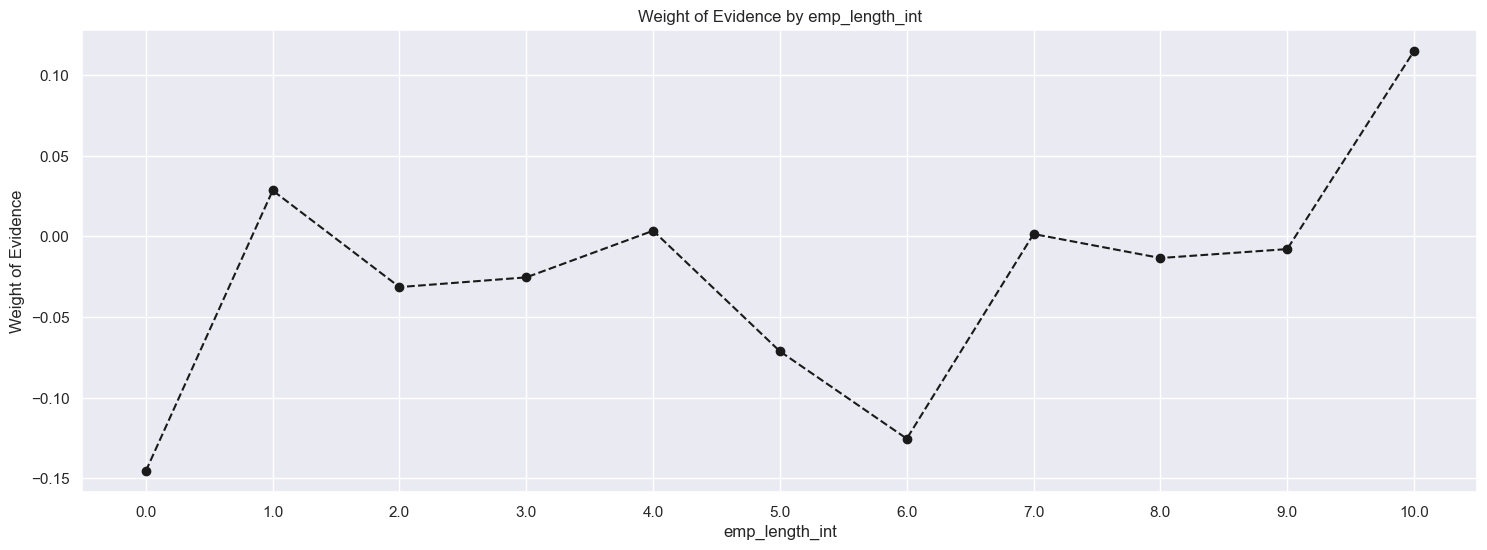

In [206]:
plot_by_woe(df_temp)

In [207]:
df_inputs_prepr['emp_length:0'] = np.where(df_inputs_prepr['emp_length_int'].isin([0]), 1, 0)
df_inputs_prepr['emp_length:1'] = np.where(df_inputs_prepr['emp_length_int'].isin([1]), 1, 0)
#This is a course classing method, the range function analyse values inside the lower range and excluding
# the higher range, therefore the name of the variable is 2-4, and not 2-5
df_inputs_prepr['emp_length:2-4'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prepr['emp_length:5-6'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prepr['emp_length:7-9'] = np.where(df_inputs_prepr['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prepr['emp_length:10'] = np.where(df_inputs_prepr['emp_length_int'].isin([10]), 1, 0)

In [208]:
df_inputs_prepr['mths_since_issue_d'].unique()

array([ 41.,  38.,  66.,  37.,  58.,  50.,  86.,  51.,  48.,  59.,  72.,
        77.,  47.,  46.,  56.,  55., 119.,  63., 102.,  39.,  53.,  40.,
        52.,  43.,  49.,  57.,  45.,  36.,  54.,  74.,  44.,  73., 103.,
        70.,  95.,  89.,  68.,  82.,  71.,  76., 104.,  65.,  80.,  91.,
        75.,  67.,  42.,  61.,  64.,  60.,  85.,  88., 110.,  96.,  78.,
        83.,  69.,  90.,  62., 108.,  79.,  92., 118.,  99.,  81., 115.,
        97., 114., 116., 100.,  93., 117., 106., 124., 101., 125.,  87.,
        84.,  94., 105., 109.,  98., 107., 112., 113., 122., 111., 120.,
       121., 123., 126.])

In [209]:
df_inputs_prepr['mths_since_issue_d_factor'] = pd.cut(df_inputs_prepr['mths_since_issue_d'], 50)

In [210]:
df_inputs_prepr['mths_since_issue_d_factor']

362514     (39.6, 41.4]
288564     (37.8, 39.6]
213591     (64.8, 66.6]
263083    (35.91, 37.8]
165001     (57.6, 59.4]
              ...      
115        (70.2, 72.0]
296284     (37.8, 39.6]
61777      (48.6, 50.4]
91763      (50.4, 52.2]
167512     (57.6, 59.4]
Name: mths_since_issue_d_factor, Length: 93257, dtype: category
Categories (50, interval[float64, right]): [(35.91, 37.8] < (37.8, 39.6] < (39.6, 41.4] < (41.4, 43.2] ... (118.8, 120.6] < (120.6, 122.4] < (122.4, 124.2] < (124.2, 126.0]]

In [211]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_issue_d_factor', df_targets_prepr)
df_temp

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(35.91, 37.8]",7191,0.960645,0.077109,6908.0,283.0,0.082014,0.031350,0.961657,NaN,NaN,0.20306
1,"(37.8, 39.6]",9752,0.948113,0.104571,9246.0,506.0,0.109771,0.056054,0.672079,0.012532,0.289579,0.20306
2,"(39.6, 41.4]",9506,0.935199,0.101933,8890.0,616.0,0.105544,0.068240,0.436104,0.012914,0.235974,0.20306
3,"(41.4, 43.2]",7240,0.928591,0.077635,6723.0,517.0,0.079817,0.057273,0.331916,0.006608,0.104188,0.20306
4,"(43.2, 45.0]",7217,0.919219,0.077388,6634.0,583.0,0.078761,0.064584,0.198445,0.009373,0.133471,0.20306
5,"(45.0, 46.8]",3104,0.909472,0.033284,2823.0,281.0,0.033515,0.031129,0.073870,0.009747,0.124575,0.20306
6,"(46.8, 48.6]",6197,0.907859,0.066451,5626.0,571.0,0.066793,0.063255,0.054434,0.001613,0.019436,0.20306
7,"(48.6, 50.4]",5821,0.903625,0.062419,5260.0,561.0,0.062448,0.062147,0.004834,0.004234,0.049599,0.20306
8,"(50.4, 52.2]",5021,0.890460,0.053840,4471.0,550.0,0.053081,0.060928,-0.137882,0.013165,0.142716,0.20306
9,"(52.2, 54.0]",4497,0.880142,0.048222,3958.0,539.0,0.046990,0.059710,-0.239553,0.010318,0.101671,0.20306


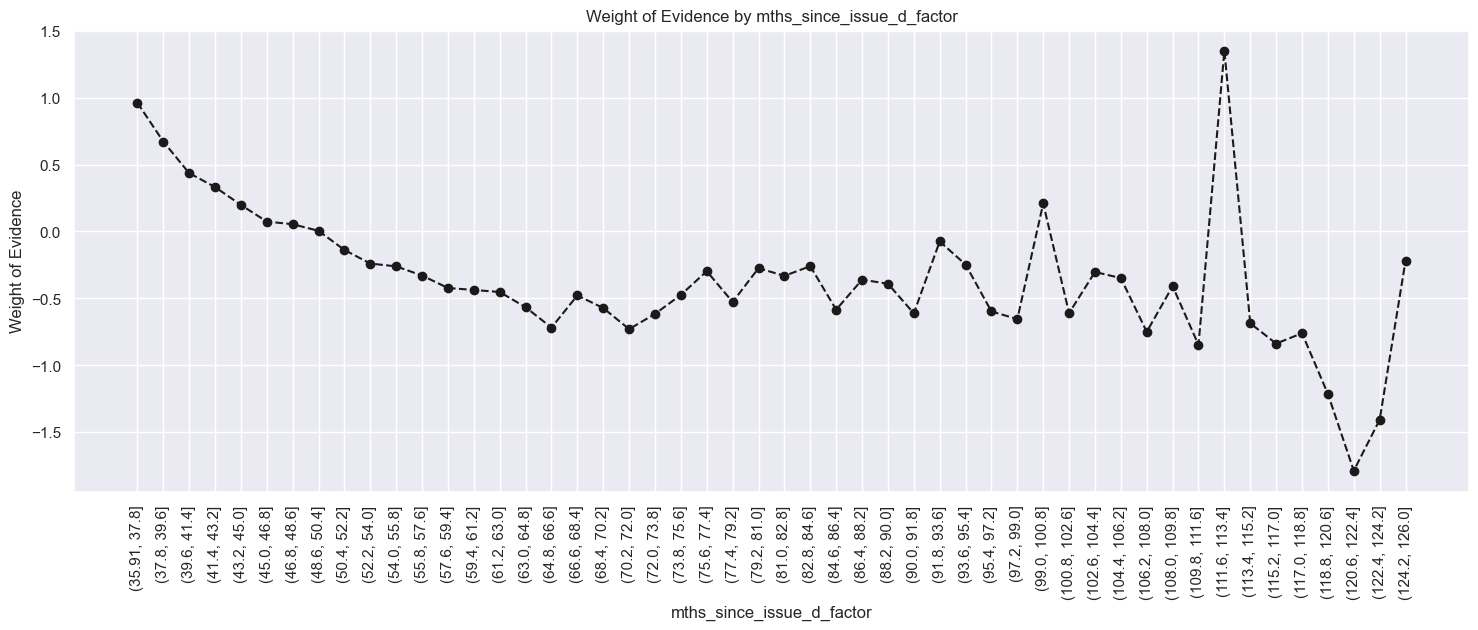

In [212]:
plot_by_woe(df_temp, 90)

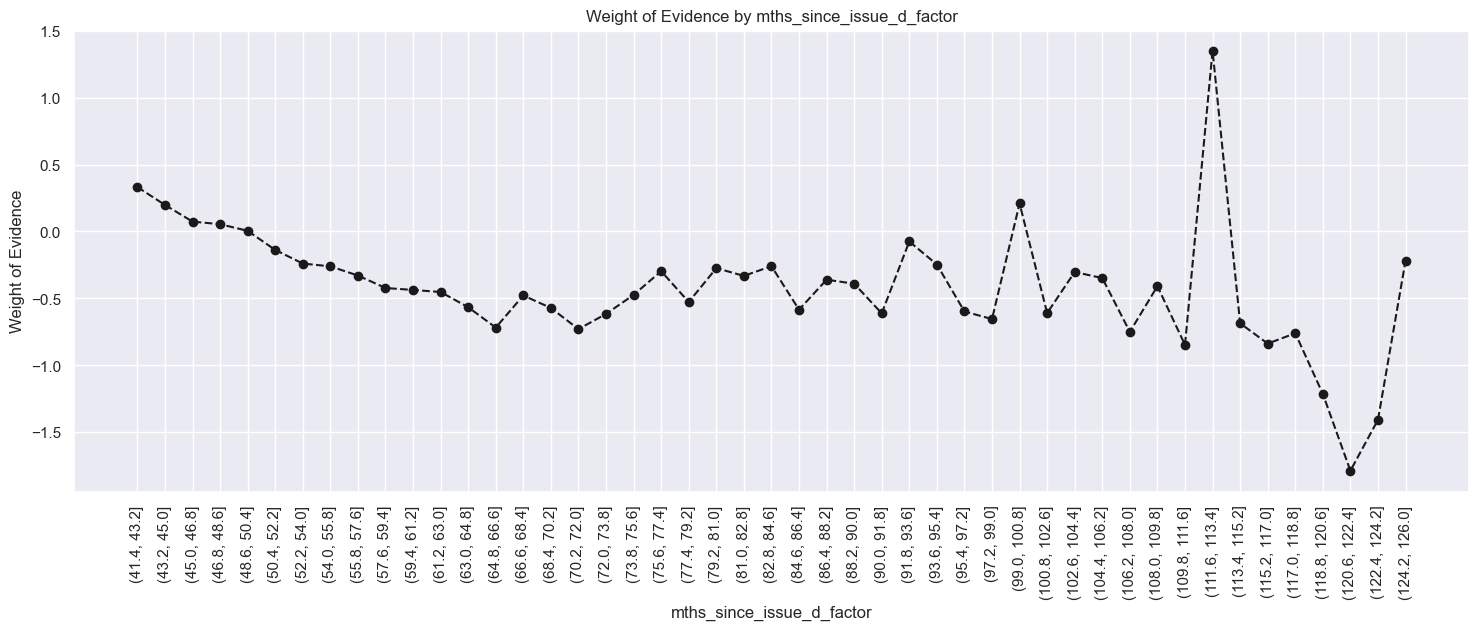

In [213]:
plot_by_woe(df_temp.iloc[3: , : ], 90)

In [214]:
df_inputs_prepr['mths_since_issue_d:<38'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38)), 1, 0)
df_inputs_prepr['mths_since_issue_d:38-39'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(38,40)), 1, 0)
df_inputs_prepr['mths_since_issue_d:40-41'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(40,42)), 1, 0)
df_inputs_prepr['mths_since_issue_d:42-48'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(42,49)), 1, 0)
df_inputs_prepr['mths_since_issue_d:49-52'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(49,53)), 1, 0)
df_inputs_prepr['mths_since_issue_d:53-64'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(53,65)), 1, 0)
df_inputs_prepr['mths_since_issue_d:65-84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(65,85)), 1, 0)
df_inputs_prepr['mths_since_issue_d:>84'] = np.where(df_inputs_prepr['mths_since_issue_d'].isin(range(85, int(df_inputs_prepr['mths_since_issue_d'].max()))), 1, 0)


In [215]:
df_inputs_prepr['int_rate_factor'] = pd.cut(df_inputs_prepr['int_rate'], 50)

In [216]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'int_rate_factor', df_targets_prepr)
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",198,0.969697,0.002123,192.0,6.0,0.002279,0.000665,1.232405,NaN,NaN,0.364404
1,"(5.833, 6.246]",2086,0.980345,0.022368,2045.0,41.0,0.024279,0.004542,1.676250,0.010648,0.443845,0.364404
2,"(6.246, 6.658]",1974,0.975177,0.021167,1925.0,49.0,0.022854,0.005428,1.437530,0.005168,0.238720,0.364404
3,"(6.658, 7.071]",477,0.949686,0.005115,453.0,24.0,0.005378,0.002659,0.704507,0.025492,0.733023,0.364404
4,"(7.071, 7.484]",804,0.983831,0.008621,791.0,13.0,0.009391,0.001440,1.875018,0.034145,1.170510,0.364404
5,"(7.484, 7.897]",3245,0.968259,0.034796,3142.0,103.0,0.037303,0.011410,1.184555,0.015572,0.690463,0.364404
6,"(7.897, 8.31]",2429,0.955537,0.026046,2321.0,108.0,0.027556,0.011964,0.834291,0.012722,0.350264,0.364404
7,"(8.31, 8.722]",1680,0.970833,0.018015,1631.0,49.0,0.019364,0.005428,1.271797,0.015296,0.437506,0.364404
8,"(8.722, 9.135]",2384,0.947567,0.025564,2259.0,125.0,0.026819,0.013847,0.661033,0.023266,0.610765,0.364404
9,"(9.135, 9.548]",1590,0.983648,0.017050,1564.0,26.0,0.018568,0.002880,1.863574,0.036081,1.202542,0.364404


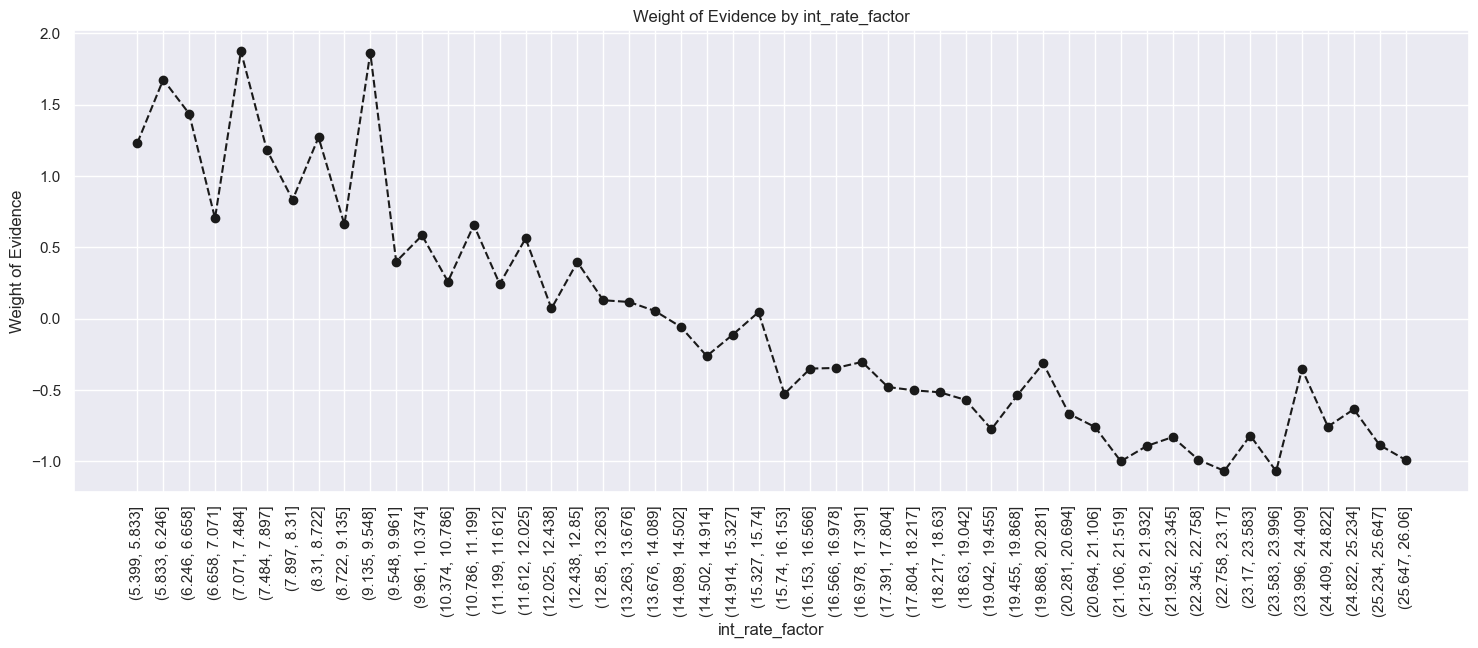

In [217]:
plot_by_woe(df_temp, 90)

In [218]:
df_inputs_prepr['int_rate:<9.548'] = np.where((df_inputs_prepr['int_rate'] <= 9.548), 1, 0)
df_inputs_prepr['int_rate:9.548-12.025'] = np.where((df_inputs_prepr['int_rate'] > 9.548) & (df_inputs_prepr['int_rate'] <= 12.025), 1, 0)
df_inputs_prepr['int_rate:12.025-15.74'] = np.where((df_inputs_prepr['int_rate'] > 12.025) & (df_inputs_prepr['int_rate'] <= 15.74), 1, 0)
df_inputs_prepr['int_rate:15.74-20.281'] = np.where((df_inputs_prepr['int_rate'] > 15.74) & (df_inputs_prepr['int_rate'] <= 20.281), 1, 0)
df_inputs_prepr['int_rate:>20.281'] = np.where((df_inputs_prepr['int_rate'] > 20.281), 1, 0)

In [219]:
df_inputs_prepr['funded_amnt_factor'] = pd.cut(df_inputs_prepr['funded_amnt'], 50)
df_temp = woe_ordered_continuous(df_inputs_prepr, 'funded_amnt_factor', df_targets_prepr)
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",319,0.887147,0.003421,283.0,36.0,0.003360,0.003988,-0.171403,NaN,NaN,0.019
1,"(1190.0, 1880.0]",800,0.897500,0.008578,718.0,82.0,0.008524,0.009084,-0.063581,0.010353,0.107822,0.019
2,"(1880.0, 2570.0]",1513,0.908130,0.016224,1374.0,139.0,0.016312,0.015398,0.057676,0.010630,0.121257,0.019
3,"(2570.0, 3260.0]",1817,0.900385,0.019484,1636.0,181.0,0.019423,0.020051,-0.031819,0.007744,0.089495,0.019
4,"(3260.0, 3950.0]",1245,0.907631,0.013350,1130.0,115.0,0.013416,0.012740,0.051710,0.007245,0.083528,0.019
5,"(3950.0, 4640.0]",2298,0.893386,0.024642,2053.0,245.0,0.024374,0.027141,-0.107532,0.014245,0.159242,0.019
6,"(4640.0, 5330.0]",3957,0.906242,0.042431,3586.0,371.0,0.042574,0.041099,0.035260,0.012857,0.142791,0.019
7,"(5330.0, 6020.0]",4186,0.915671,0.044887,3833.0,353.0,0.045506,0.039105,0.151604,0.009429,0.116344,0.019
8,"(6020.0, 6710.0]",1718,0.891735,0.018422,1532.0,186.0,0.018188,0.020605,-0.124748,0.023937,0.276352,0.019
9,"(6710.0, 7400.0]",2880,0.906597,0.030882,2611.0,269.0,0.030998,0.029799,0.039446,0.014863,0.164195,0.019


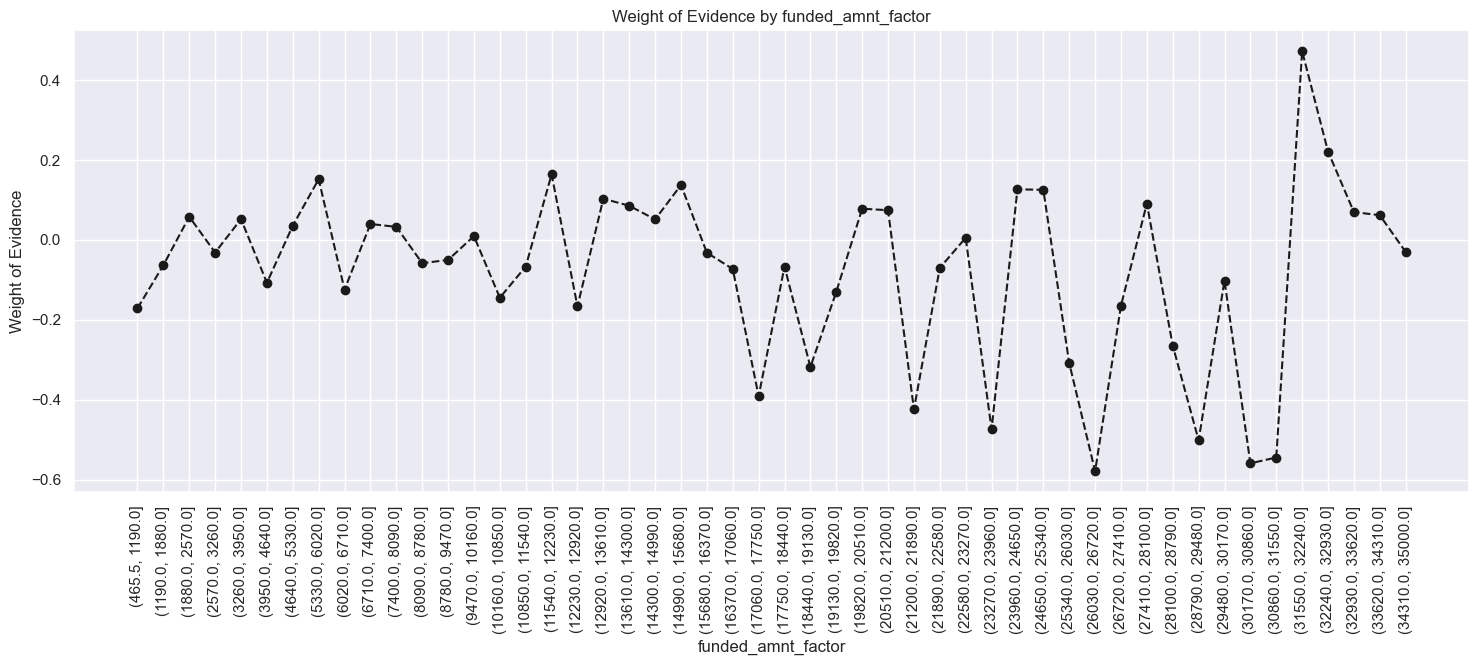

In [220]:
plot_by_woe(df_temp, 90)

THIS VARIABLE HAS VERY DIFFERENT WEIGHT OF EVIDENCE, BUT ATE THE SAME TIME THE GRAPHIC SHOWS A TREND THAT IS ALMOST HORIZONTAL, SEEMS THERE IS NO ASSOCIATION BETWEEN THE INDEPENDENT VARIABLE, SO THIS VARIABLE WILL BE DISCARTED

In [221]:
df_inputs_prepr['mths_since_earliest_cr_line'].unique()

array([188., 172., 189., 112., 374., 207., 332., 266., 383., 269., 328.,
       237., 293., 242., 228., 287., 231., 206., 263., 167., 239., 134.,
       441., 195., 127., 286., 192., 518., 170., 147., 150., 252., 202.,
       197., 190., 300., 233., 220., 416., 225., 217., 200., 209., 587.,
       194., 262., 156., 227., 391., 141., 183., 302., 267., 312., 362.,
       216., 438., 249., 273., 182., 221., 187., 567., 245., 205., 347.,
       214., 299., 176., 397., 386., 253., 243., 398., 153., 466., 198.,
       229., 241., 180., 389., 181., 169., 261., 378., 324., 400., 232.,
       486., 123., 350., 549., 139., 244., 255., 126., 219., 175., 115.,
       413., 173., 210., 274., 354., 254., 327., 321., 323., 201., 171.,
       280., 443., 329., 294., 257., 223., 258., 259., 158., 348., 162.,
       168., 303., 313., 298., 320.,  91., 439., 174., 520., 251., 317.,
       144., 204., 246., 406., 119., 304., 279., 379., 230., 160., 305.,
        79., 196., 306., 333., 331., 256., 113., 34

In [222]:
df_inputs_prepr['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prepr['mths_since_earliest_cr_line'], 50)
df_inputs_prepr['mths_since_earliest_cr_line_factor']

362514    (187.84, 199.58]
288564     (164.36, 176.1]
213591    (187.84, 199.58]
263083     (105.66, 117.4]
165001    (363.94, 375.68]
                ...       
115       (129.14, 140.88]
296284    (375.68, 387.42]
61777     (258.28, 270.02]
91763      (293.5, 305.24]
167512     (223.06, 234.8]
Name: mths_since_earliest_cr_line_factor, Length: 93257, dtype: category
Categories (50, interval[float64, right]): [(-0.587, 11.74] < (11.74, 23.48] < (23.48, 35.22] < (35.22, 46.96] ... (540.04, 551.78] < (551.78, 563.52] < (563.52, 575.26] < (575.26, 587.0]]

In [223]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'mths_since_earliest_cr_line_factor', df_targets_prepr)
df_temp

,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.587, 11.74]",5,1.000000,0.000054,5.0,0.0,0.000059,0.000000,inf,NaN,NaN,inf
1,"(11.74, 23.48]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
2,"(23.48, 35.22]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
3,"(35.22, 46.96]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
4,"(46.96, 58.7]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
5,"(58.7, 70.44]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
6,"(70.44, 82.18]",182,0.945055,0.001952,172.0,10.0,0.002042,0.001108,0.611578,NaN,NaN,inf
7,"(82.18, 93.92]",508,0.927165,0.005447,471.0,37.0,0.005592,0.004099,0.310609,0.017890,0.300969,inf
8,"(93.92, 105.66]",715,0.881119,0.007667,630.0,85.0,0.007480,0.009416,-0.230263,0.046046,0.540872,inf
9,"(105.66, 117.4]",1268,0.870662,0.013597,1104.0,164.0,0.013107,0.018168,-0.326502,0.010456,0.096240,inf


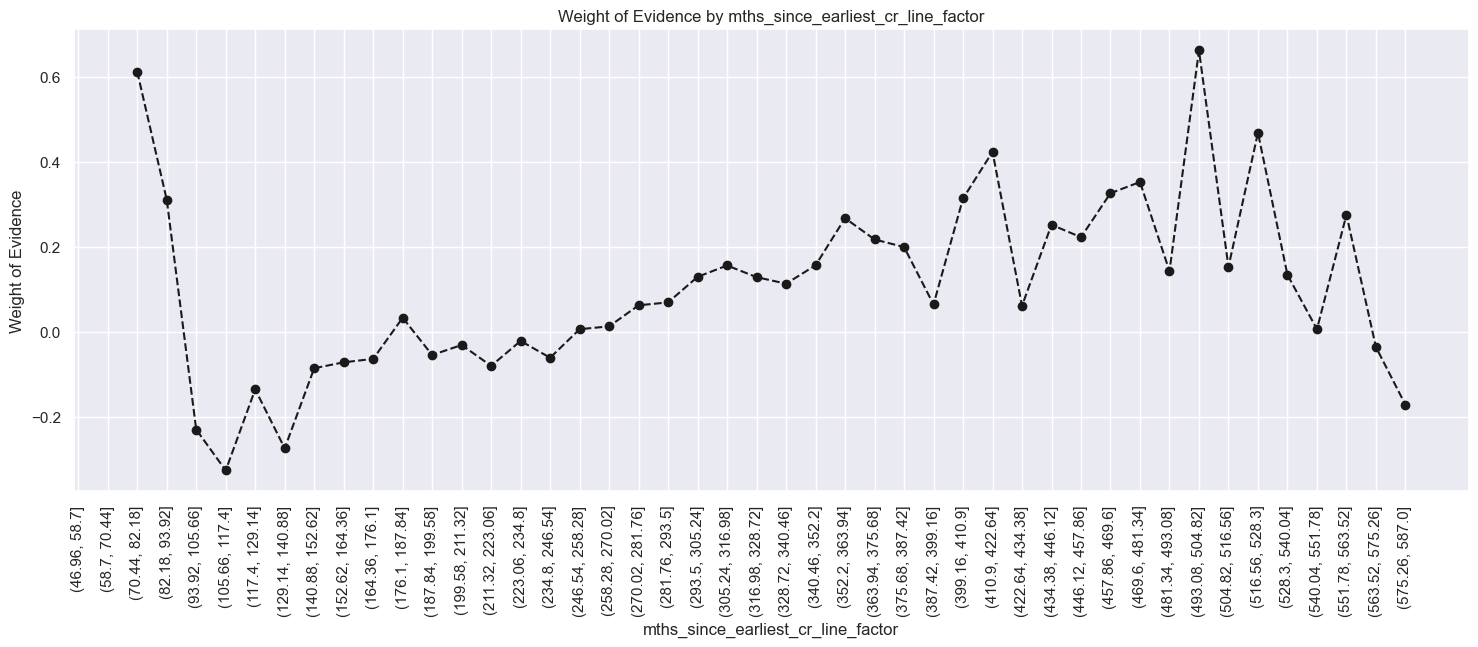

In [224]:
plot_by_woe(df_temp, 90)

In [225]:
# We create the following categories:
# < 140, # 141 - 164, # 165 - 247, # 248 - 270, # 271 - 352, # > 352
df_inputs_prepr['mths_since_earliest_cr_line:<140'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:141-164'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(140, 165)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:165-247'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(165, 248)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:248-270'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(248, 271)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:271-352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(271, 353)), 1, 0)
df_inputs_prepr['mths_since_earliest_cr_line:>352'] = np.where(df_inputs_prepr['mths_since_earliest_cr_line'].isin(range(353, int(df_inputs_prepr['mths_since_earliest_cr_line'].max()))), 1, 0)

In [226]:
df_inputs_prepr['installment'].unique()

array([ 773.01,  297.53, 1034.83, ...,  414.23,  494.33,  121.42])

In [227]:
df_inputs_prepr['installment_factor'] = pd.cut(df_inputs_prepr['installment'],50)

In [228]:
df_inputs_prepr['installment_factor']

362514      (767.035, 794.86]
288564      (294.01, 321.835]
213591    (1017.46, 1045.285]
263083      (321.835, 349.66]
165001      (460.96, 488.785]
                 ...         
115         (238.36, 266.185]
296284      (488.785, 516.61]
61777     (1100.935, 1128.76]
91763       (544.435, 572.26]
167512      (488.785, 516.61]
Name: installment_factor, Length: 93257, dtype: category
Categories (50, interval[float64, right]): [(14.369, 43.585] < (43.585, 71.41] < (71.41, 99.235] < (99.235, 127.06] ... (1295.71, 1323.535] < (1323.535, 1351.36] < (1351.36, 1379.185] < (1379.185, 1407.01]]

In [229]:
df_temp = woe_ordered_continuous(df_inputs_prepr, 'installment_factor', df_targets_prepr)
df_temp

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(14.369, 43.585]",485,0.874227,0.005201,424.0,61.0,0.005034,0.006758,-0.294471,NaN,NaN,inf
1,"(43.585, 71.41]",1246,0.907705,0.013361,1131.0,115.0,0.013428,0.012740,0.052594,0.033478,0.347066,inf
2,"(71.41, 99.235]",1731,0.903524,0.018562,1564.0,167.0,0.018568,0.018500,0.003677,0.004181,0.048917,inf
3,"(99.235, 127.06]",2292,0.907941,0.024577,2081.0,211.0,0.024706,0.023374,0.055415,0.004417,0.051738,inf
4,"(127.06, 154.885]",2602,0.896234,0.027901,2332.0,270.0,0.027686,0.029910,-0.077271,0.011707,0.132686,inf
5,"(154.885, 182.71]",4133,0.905880,0.044318,3744.0,389.0,0.044450,0.043093,0.030999,0.009646,0.108271,inf
6,"(182.71, 210.535]",4109,0.913361,0.044061,3753.0,356.0,0.044557,0.039437,0.122049,0.007481,0.091050,inf
7,"(210.535, 238.36]",3730,0.910188,0.039997,3395.0,335.0,0.040306,0.037111,0.082597,0.003173,0.039452,inf
8,"(238.36, 266.185]",4660,0.913948,0.049969,4259.0,401.0,0.050564,0.044422,0.129497,0.003761,0.046900,inf
9,"(266.185, 294.01]",4975,0.903719,0.053347,4496.0,479.0,0.053378,0.053063,0.005912,0.010230,0.123585,inf


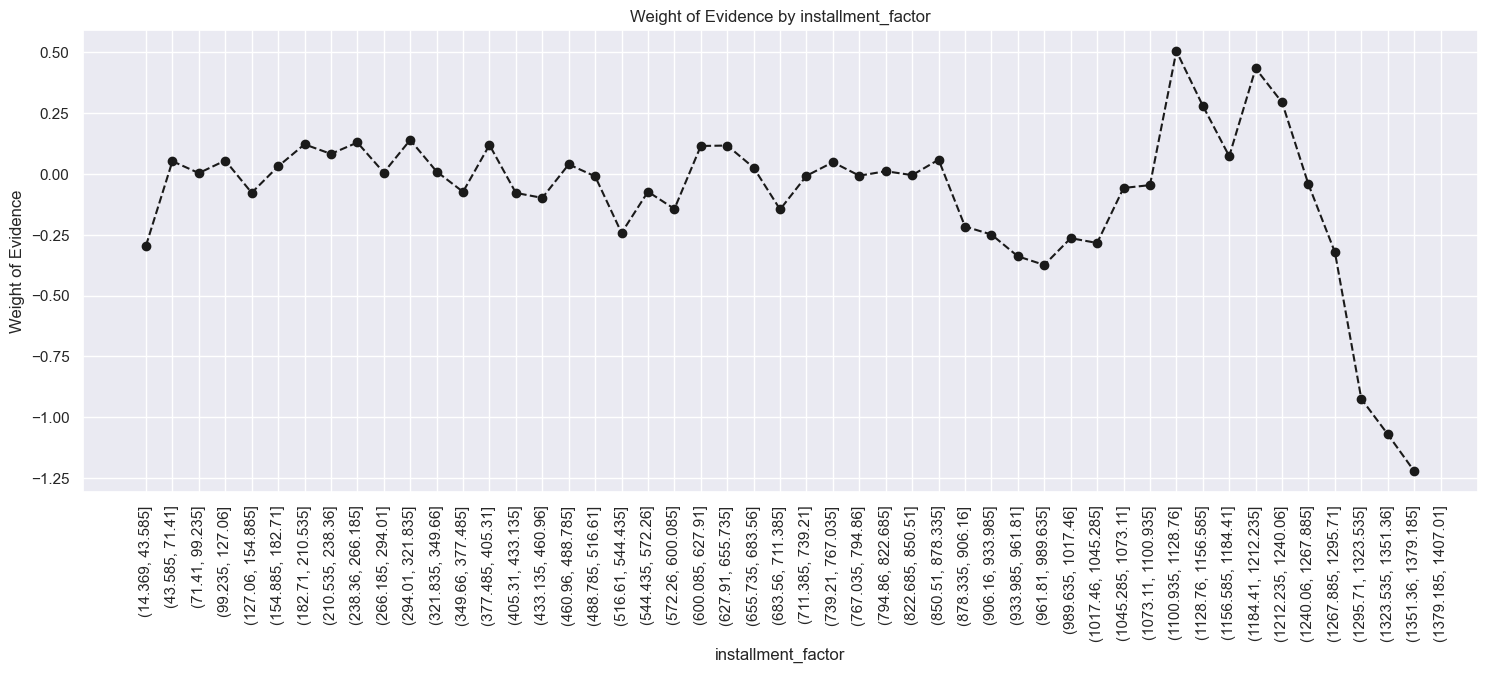

In [230]:
plot_by_woe(df_temp, 90)

Discarted ^^^

In [231]:
# Categories: 0, 1-3, >=4
df_inputs_prepr['delinq_2yrs:0'] = np.where((df_inputs_prepr['delinq_2yrs'] == 0), 1, 0)
df_inputs_prepr['delinq_2yrs:1-3'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 1) & (df_inputs_prepr['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prepr['delinq_2yrs:>=4'] = np.where((df_inputs_prepr['delinq_2yrs'] >= 9), 1, 0)

In [232]:
# Categories: 0, 1 - 2, 3 - 6, > 6
df_inputs_prepr['inq_last_6mths:0'] = np.where((df_inputs_prepr['inq_last_6mths'] == 0), 1, 0)
df_inputs_prepr['inq_last_6mths:1-2'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 1) & (df_inputs_prepr['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prepr['inq_last_6mths:3-6'] = np.where((df_inputs_prepr['inq_last_6mths'] >= 3) & (df_inputs_prepr['inq_last_6mths'] <= 6), 1, 0)
df_inputs_prepr['inq_last_6mths:>6'] = np.where((df_inputs_prepr['inq_last_6mths'] > 6), 1, 0)

In [233]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22', '23-25', '26-30', '>30'
df_inputs_prepr['open_acc:0'] = np.where((df_inputs_prepr['open_acc'] == 0), 1, 0)
df_inputs_prepr['open_acc:1-3'] = np.where((df_inputs_prepr['open_acc'] >= 1) & (df_inputs_prepr['open_acc'] <= 3), 1, 0)
df_inputs_prepr['open_acc:4-12'] = np.where((df_inputs_prepr['open_acc'] >= 4) & (df_inputs_prepr['open_acc'] <= 12), 1, 0)
df_inputs_prepr['open_acc:13-17'] = np.where((df_inputs_prepr['open_acc'] >= 13) & (df_inputs_prepr['open_acc'] <= 17), 1, 0)
df_inputs_prepr['open_acc:18-22'] = np.where((df_inputs_prepr['open_acc'] >= 18) & (df_inputs_prepr['open_acc'] <= 22), 1, 0)
df_inputs_prepr['open_acc:23-25'] = np.where((df_inputs_prepr['open_acc'] >= 23) & (df_inputs_prepr['open_acc'] <= 25), 1, 0)
df_inputs_prepr['open_acc:26-30'] = np.where((df_inputs_prepr['open_acc'] >= 26) & (df_inputs_prepr['open_acc'] <= 30), 1, 0)
df_inputs_prepr['open_acc:>=31'] = np.where((df_inputs_prepr['open_acc'] >= 31), 1, 0)

In [234]:
# Categories '0-2', '3-4', '>=5'
df_inputs_prepr['pub_rec:0-2'] = np.where((df_inputs_prepr['pub_rec'] >= 0) & (df_inputs_prepr['pub_rec'] <= 2), 1, 0)
df_inputs_prepr['pub_rec:3-4'] = np.where((df_inputs_prepr['pub_rec'] >= 3) & (df_inputs_prepr['pub_rec'] <= 4), 1, 0)
df_inputs_prepr['pub_rec:>=5'] = np.where((df_inputs_prepr['pub_rec'] >= 5), 1, 0)

In [235]:
# Categories: '<=27', '28-51', '>51'
df_inputs_prepr['total_acc:<=27'] = np.where((df_inputs_prepr['total_acc'] <= 27), 1, 0)
df_inputs_prepr['total_acc:28-51'] = np.where((df_inputs_prepr['total_acc'] >= 28) & (df_inputs_prepr['total_acc'] <= 51), 1, 0)
df_inputs_prepr['total_acc:>=52'] = np.where((df_inputs_prepr['total_acc'] >= 52), 1, 0)

In [236]:
# Categories: '0', '>=1'
df_inputs_prepr['acc_now_delinq:0'] = np.where((df_inputs_prepr['acc_now_delinq'] == 0), 1, 0)
df_inputs_prepr['acc_now_delinq:>=1'] = np.where((df_inputs_prepr['acc_now_delinq'] >= 1), 1, 0)

In [237]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prepr['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 5000) & (df_inputs_prepr['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 10000) & (df_inputs_prepr['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 20000) & (df_inputs_prepr['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 30000) & (df_inputs_prepr['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 40000) & (df_inputs_prepr['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 55000) & (df_inputs_prepr['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prepr['total_rev_hi_lim:>95K'] = np.where((df_inputs_prepr['total_rev_hi_lim'] > 95000), 1, 0)

ANUAL INCOME- HARD ONE

In [238]:
# annual_inc
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-2695.2, 154704.0]",89203,0.901584,0.956529,80424.0,8779.0,0.954814,0.972527,-0.018381,NaN,NaN,inf
1,"(154704.0, 304608.0]",3626,0.937672,0.038882,3400.0,226.0,0.040366,0.025036,0.477665,0.036088,0.496046,inf
2,"(304608.0, 454512.0]",282,0.936170,0.003024,264.0,18.0,0.003134,0.001994,0.452246,0.001502,0.025418,inf
3,"(454512.0, 604416.0]",86,0.965116,0.000922,83.0,3.0,0.000985,0.000332,1.086897,0.028946,0.634651,inf
4,"(604416.0, 754320.0]",23,1.000000,0.000247,23.0,0.0,0.000273,0.000000,inf,0.034884,inf,inf
5,"(754320.0, 904224.0]",18,0.944444,0.000193,17.0,1.0,0.000202,0.000111,0.599882,0.055556,inf,inf
6,"(904224.0, 1054128.0]",7,1.000000,0.000075,7.0,0.0,0.000083,0.000000,inf,0.055556,inf,inf
7,"(1054128.0, 1204032.0]",6,1.000000,0.000064,6.0,0.0,0.000071,0.000000,inf,0.000000,NaN,inf
8,"(1204032.0, 1353936.0]",2,1.000000,0.000021,2.0,0.0,0.000024,0.000000,inf,0.000000,NaN,inf
9,"(1353936.0, 1503840.0]",2,1.000000,0.000021,2.0,0.0,0.000024,0.000000,inf,0.000000,NaN,inf


In [239]:
df_inputs_prepr['annual_inc_factor'] = pd.cut(df_inputs_prepr['annual_inc'], 100)
# Here we do fine-classing: using the 'cut' method, we split the variable into 100 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr, 'annual_inc_factor', df_targets_prepr)
# We calculate weight of evidence.
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-2695.2, 79752.0]",62621,0.891155,0.671488,55805.0,6816.0,0.662531,0.755068,-0.130740,NaN,NaN,inf
1,"(79752.0, 154704.0]",26582,0.926153,0.285040,24619.0,1963.0,0.292283,0.217459,0.295714,0.034998,0.426454,inf
2,"(154704.0, 229656.0]",2916,0.936214,0.031268,2730.0,186.0,0.032411,0.020605,0.452979,0.010061,0.157266,inf
3,"(229656.0, 304608.0]",710,0.943662,0.007613,670.0,40.0,0.007954,0.004431,0.585067,0.007448,0.132088,inf
4,"(304608.0, 379560.0]",171,0.935673,0.001834,160.0,11.0,0.001900,0.001219,0.443947,0.007989,0.141120,inf
5,"(379560.0, 454512.0]",111,0.936937,0.001190,104.0,7.0,0.001235,0.000775,0.465150,0.001264,0.021202,inf
6,"(454512.0, 529464.0]",53,0.962264,0.000568,51.0,2.0,0.000605,0.000222,1.005347,0.025327,0.540198,inf
7,"(529464.0, 604416.0]",33,0.969697,0.000354,32.0,1.0,0.000380,0.000111,1.232405,0.007433,0.227057,inf
8,"(604416.0, 679368.0]",10,1.000000,0.000107,10.0,0.0,0.000119,0.000000,inf,0.030303,inf,inf
9,"(679368.0, 754320.0]",13,1.000000,0.000139,13.0,0.0,0.000154,0.000000,inf,0.000000,NaN,inf


In [240]:
# Initial examination shows that there are too few individuals with large income and too many with small income.
# Hence, we are going to have one category for more than 150K, and we are going to apply our approach to determine
# the categories of everyone with 140k or less.
df_inputs_prepr_temp = df_inputs_prepr.loc[df_inputs_prepr['annual_inc'] <= 140000, : ]
#loan_data_temp = loan_data_temp.reset_index(drop = True)
#df_inputs_prepr_temp

In [241]:
df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'annual_inc_factor', df_targets_prepr[df_inputs_prepr_temp.index])
# df_targets_prepr[df_inputs_prepr_temp.index] -> ITS TO SELECT ONLY THE FRAME UP TO 140K INCOME
# We calculate weight of evidence.
df_temp

C:\Users\SH623GL\AppData\Local\Temp\ipykernel_6680\4022836566.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_inputs_prepr_temp["annual_inc_factor"] = pd.cut(df_inputs_prepr_temp['annual_inc'], 50)


,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(4664.8, 7504.0]",10,1.000000,0.000114,10.0,0.0,0.000127,0.000000,inf,NaN,NaN,inf
1,"(7504.0, 10208.0]",84,0.773810,0.000958,65.0,19.0,0.000823,0.002188,-0.978106,0.226190,inf,inf
2,"(10208.0, 12912.0]",123,0.813008,0.001403,100.0,23.0,0.001266,0.002649,-0.738378,0.039199,0.239728,inf
3,"(12912.0, 15616.0]",304,0.868421,0.003467,264.0,40.0,0.003341,0.004606,-0.320985,0.055413,0.417394,inf
4,"(15616.0, 18320.0]",383,0.832898,0.004368,319.0,64.0,0.004038,0.007370,-0.601746,0.035523,0.280762,inf
5,"(18320.0, 21024.0]",733,0.856753,0.008359,628.0,105.0,0.007949,0.012091,-0.419474,0.023855,0.182272,inf
6,"(21024.0, 23728.0]",704,0.867898,0.008028,611.0,93.0,0.007733,0.010709,-0.325557,0.011145,0.093918,inf
7,"(23728.0, 26432.0]",1785,0.871709,0.020356,1556.0,229.0,0.019694,0.026370,-0.291903,0.003811,0.033654,inf
8,"(26432.0, 29136.0]",1355,0.866421,0.015452,1174.0,181.0,0.014859,0.020843,-0.338379,0.005288,0.046477,inf
9,"(29136.0, 31840.0]",2292,0.864747,0.026137,1982.0,310.0,0.025086,0.035698,-0.352765,0.001674,0.014386,inf


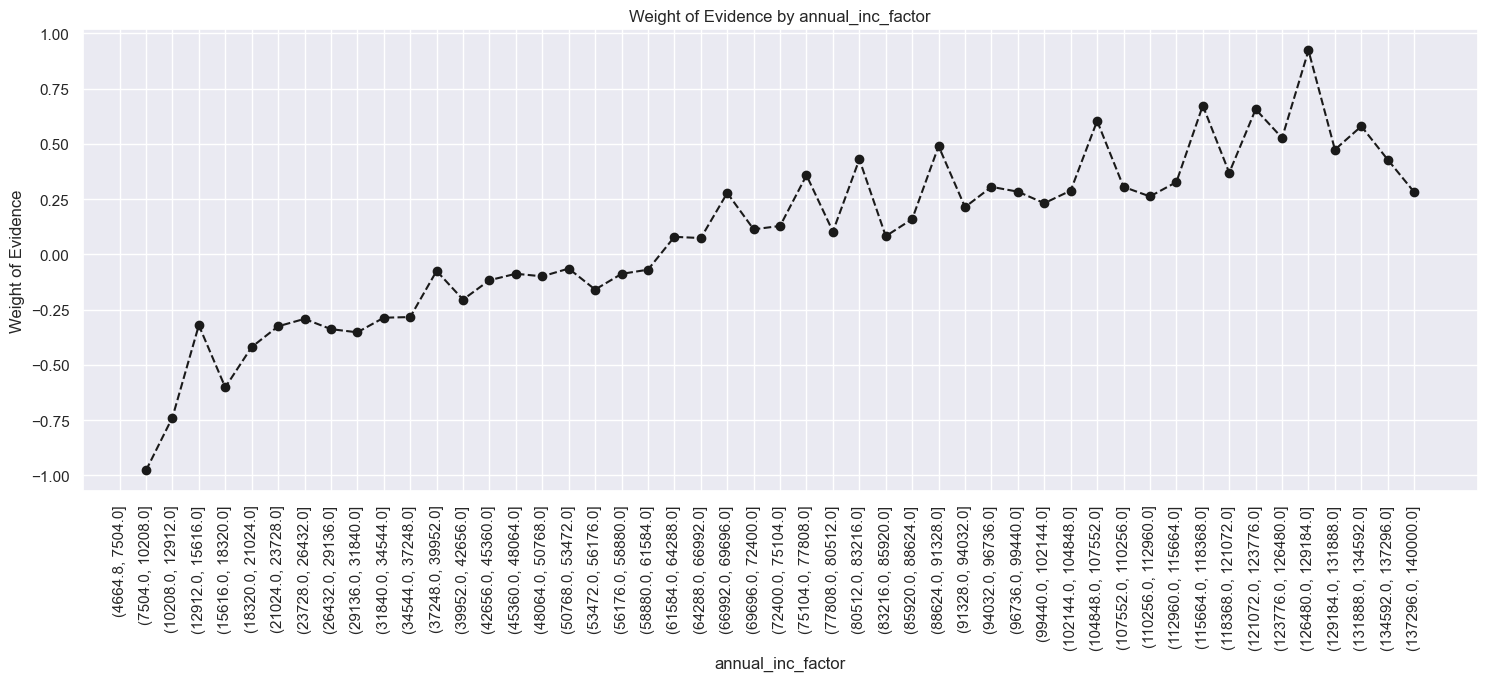

In [242]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [243]:
# WoE is monotonically decreasing with income, so we split income in 10 equal categories, each with width of 15k.
df_inputs_prepr['annual_inc:<20K'] = np.where((df_inputs_prepr['annual_inc'] <= 20000), 1, 0)
df_inputs_prepr['annual_inc:20K-30K'] = np.where((df_inputs_prepr['annual_inc'] > 20000) & (df_inputs_prepr['annual_inc'] <= 30000), 1, 0)
df_inputs_prepr['annual_inc:30K-40K'] = np.where((df_inputs_prepr['annual_inc'] > 30000) & (df_inputs_prepr['annual_inc'] <= 40000), 1, 0)
df_inputs_prepr['annual_inc:40K-50K'] = np.where((df_inputs_prepr['annual_inc'] > 40000) & (df_inputs_prepr['annual_inc'] <= 50000), 1, 0)
df_inputs_prepr['annual_inc:50K-60K'] = np.where((df_inputs_prepr['annual_inc'] > 50000) & (df_inputs_prepr['annual_inc'] <= 60000), 1, 0)
df_inputs_prepr['annual_inc:60K-70K'] = np.where((df_inputs_prepr['annual_inc'] > 60000) & (df_inputs_prepr['annual_inc'] <= 70000), 1, 0)
df_inputs_prepr['annual_inc:70K-80K'] = np.where((df_inputs_prepr['annual_inc'] > 70000) & (df_inputs_prepr['annual_inc'] <= 80000), 1, 0)
df_inputs_prepr['annual_inc:80K-90K'] = np.where((df_inputs_prepr['annual_inc'] > 80000) & (df_inputs_prepr['annual_inc'] <= 90000), 1, 0)
df_inputs_prepr['annual_inc:90K-100K'] = np.where((df_inputs_prepr['annual_inc'] > 90000) & (df_inputs_prepr['annual_inc'] <= 100000), 1, 0)
df_inputs_prepr['annual_inc:100K-120K'] = np.where((df_inputs_prepr['annual_inc'] > 100000) & (df_inputs_prepr['annual_inc'] <= 120000), 1, 0)
df_inputs_prepr['annual_inc:120K-140K'] = np.where((df_inputs_prepr['annual_inc'] > 120000) & (df_inputs_prepr['annual_inc'] <= 140000), 1, 0)
df_inputs_prepr['annual_inc:>140K'] = np.where((df_inputs_prepr['annual_inc'] > 140000), 1, 0)

In [244]:
df_inputs_prepr_temp = df_inputs_prepr[pd.notnull(df_inputs_prepr['mths_since_last_delinq'])]
df_inputs_prepr['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prepr['mths_since_last_delinq'], 50)


In [246]:
df_temp = woe_ordered_continuous(df_inputs_prepr_temp, 'mths_since_last_delinq_factor', df_targets_prepr[df_inputs_prepr_temp.index])
df_temp

KeyError: 'mths_since_last_delinq_factor'

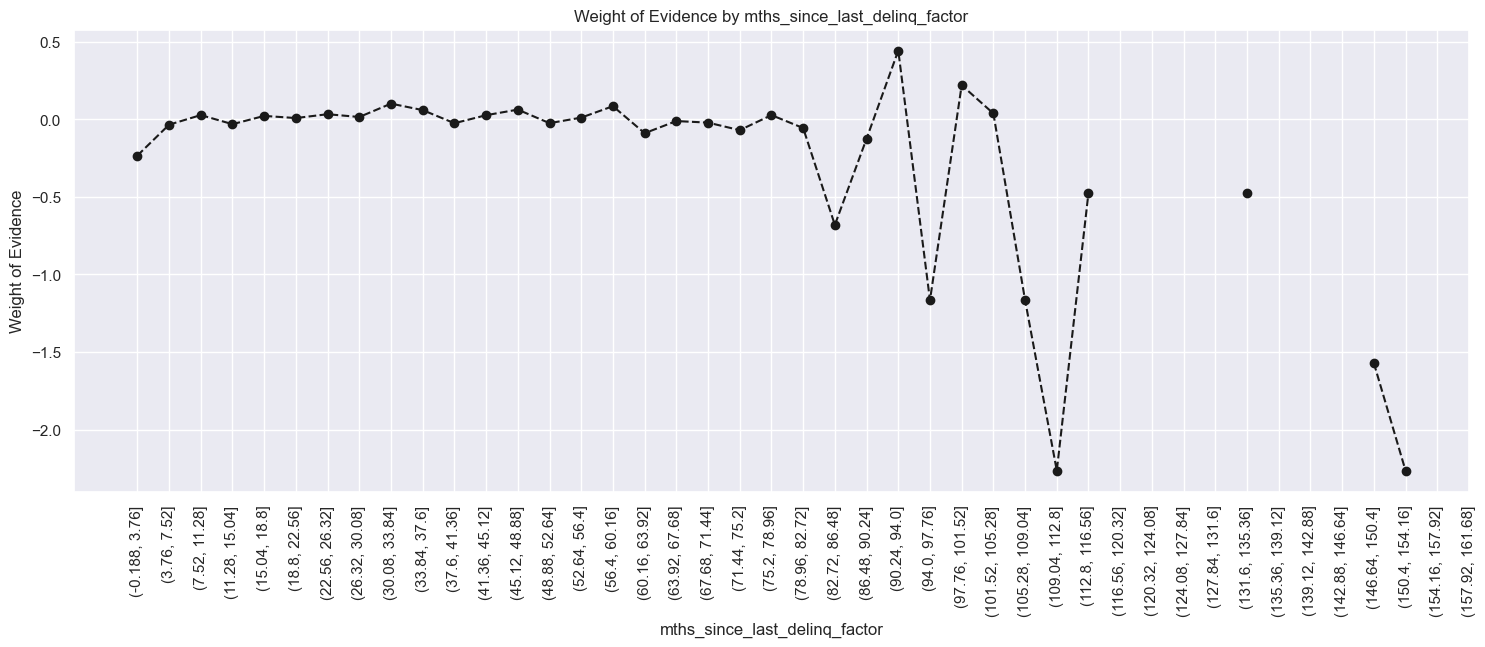

In [ ]:
plot_by_woe(df_temp, 90)

In [247]:
# Categories: Missing, 0-3, 4-30, 31-56, >=57
df_inputs_prepr['mths_since_last_delinq:Missing'] = np.where((df_inputs_prepr['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_delinq:0-3'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 0) & (df_inputs_prepr['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prepr['mths_since_last_delinq:4-30'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 4) & (df_inputs_prepr['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prepr['mths_since_last_delinq:31-56'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 31) & (df_inputs_prepr['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prepr['mths_since_last_delinq:>=57'] = np.where((df_inputs_prepr['mths_since_last_delinq'] >= 57), 1, 0)

In [248]:
# Categories:
df_inputs_prepr['dti:<=1.4'] = np.where((df_inputs_prepr['dti'] <= 1.4), 1, 0)
df_inputs_prepr['dti:1.4-3.5'] = np.where((df_inputs_prepr['dti'] > 1.4) & (df_inputs_prepr['dti'] <= 3.5), 1, 0)
df_inputs_prepr['dti:3.5-7.7'] = np.where((df_inputs_prepr['dti'] > 3.5) & (df_inputs_prepr['dti'] <= 7.7), 1, 0)
df_inputs_prepr['dti:7.7-10.5'] = np.where((df_inputs_prepr['dti'] > 7.7) & (df_inputs_prepr['dti'] <= 10.5), 1, 0)
df_inputs_prepr['dti:10.5-16.1'] = np.where((df_inputs_prepr['dti'] > 10.5) & (df_inputs_prepr['dti'] <= 16.1), 1, 0)
df_inputs_prepr['dti:16.1-20.3'] = np.where((df_inputs_prepr['dti'] > 16.1) & (df_inputs_prepr['dti'] <= 20.3), 1, 0)
df_inputs_prepr['dti:20.3-21.7'] = np.where((df_inputs_prepr['dti'] > 20.3) & (df_inputs_prepr['dti'] <= 21.7), 1, 0)
df_inputs_prepr['dti:21.7-22.4'] = np.where((df_inputs_prepr['dti'] > 21.7) & (df_inputs_prepr['dti'] <= 22.4), 1, 0)
df_inputs_prepr['dti:22.4-35'] = np.where((df_inputs_prepr['dti'] > 22.4) & (df_inputs_prepr['dti'] <= 35), 1, 0)
df_inputs_prepr['dti:>35'] = np.where((df_inputs_prepr['dti'] > 35), 1, 0)

In [249]:
# Categories: 'Missing', '0-2', '3-20', '21-31', '32-80', '81-86', '>86'
df_inputs_prepr['mths_since_last_record:Missing'] = np.where((df_inputs_prepr['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prepr['mths_since_last_record:0-2'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 0) & (df_inputs_prepr['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prepr['mths_since_last_record:3-20'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 3) & (df_inputs_prepr['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prepr['mths_since_last_record:21-31'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 21) & (df_inputs_prepr['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prepr['mths_since_last_record:32-80'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 32) & (df_inputs_prepr['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prepr['mths_since_last_record:81-86'] = np.where((df_inputs_prepr['mths_since_last_record'] >= 81) & (df_inputs_prepr['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prepr['mths_since_last_record:>86'] = np.where((df_inputs_prepr['mths_since_last_record'] > 86), 1, 0)

Preprocessing the Test Dataset

In [251]:
#After preprocesing all the variables we need now update all the datasets with the new variables
#we need to subscribe the datasets taking some carefull steps
#loan_data_inputs_train = df_inputs_prepr
# 1 - The code above need to be runned and commented after, cause now both sets contained the preprocessing
# inputs data
# 2 - Go to line ~64 and follow the instructions to comment and uncomment the respective rows
# 3 - Uncomment the line bellow and run
loan_data_inputs_test = df_inputs_prepr


In [252]:
loan_data_inputs_train.to_csv('loan_data_inputs_train.csv')
loan_data_targets_train.to_csv('loan_data_targets_train.csv')
loan_data_inputs_test.to_csv('loan_data_inputs_test.csv')
loan_data_targets_test.to_csv('loan_data_targets_test.csv')